In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from unipath import Path

#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

import itertools 


In [2]:
def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [3]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [4]:
rutabase = Path('/Users/ronaldverdugol/Desktop/Magister/6to/')

In [5]:
df = pd.concat(
    map(pd.read_csv, [rutabase +'1.csv', rutabase +'2.csv', rutabase +'3.csv']), ignore_index=True)
df.shape 

(90166, 34)

In [6]:
df.isnull().sum()

FECHA_VENTA               0
FECHACREACION             0
DESCRIPCION               0
CATEG_ID                  0
item_nbr                  0
item_desc_1               0
UNIDADES_VEND             0
MONTO_VENTA               0
TOTAL                  4017
INSTOCK                4017
QTY_ITEM_SUBCAT           0
MAXSHELF                228
CAPACIDAD_ESTANTE       228
EXISTENCIA               20
QUIEBRE_STOCK             0
BIN_QTY                   0
REPONER_QUIEBRE           0
LLENAR_GONDOLA            0
PISOVENTA                20
BACKROOM                 20
BIN_INCONSISTENCIAS       0
COM_BINS                  0
WHPK_QTY                228
QUIEBRE_COMP           5881
SALES_L3W                18
venta_quiebres            3
venta_llenado             0
venta_oostock             0
QUIEBRES_OPERACION        0
QUIEBRES_SUPPLY           0
QUIEBRES_COMERCIAL        0
QUIEBRES_OTROS            0
NUMERADOR_NSG             0
DENOMINADOR_NSG        2181
dtype: int64

In [7]:
df = df.drop(['QTY_ITEM_SUBCAT', 'TOTAL', 'QUIEBRE_COMP'], axis =1)

In [8]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

INSTOCK                4.455116
DENOMINADOR_NSG        2.418872
WHPK_QTY               0.252867
CAPACIDAD_ESTANTE      0.252867
MAXSHELF               0.252867
EXISTENCIA             0.022181
PISOVENTA              0.022181
BACKROOM               0.022181
SALES_L3W              0.019963
venta_quiebres         0.003327
QUIEBRES_SUPPLY        0.000000
QUIEBRES_OPERACION     0.000000
venta_oostock          0.000000
QUIEBRES_COMERCIAL     0.000000
COM_BINS               0.000000
QUIEBRES_OTROS         0.000000
venta_llenado          0.000000
NUMERADOR_NSG          0.000000
FECHA_VENTA            0.000000
BIN_INCONSISTENCIAS    0.000000
FECHACREACION          0.000000
REPONER_QUIEBRE        0.000000
BIN_QTY                0.000000
QUIEBRE_STOCK          0.000000
MONTO_VENTA            0.000000
UNIDADES_VEND          0.000000
item_desc_1            0.000000
item_nbr               0.000000
CATEG_ID               0.000000
DESCRIPCION            0.000000
LLENAR_GONDOLA         0.000000
dtype: f

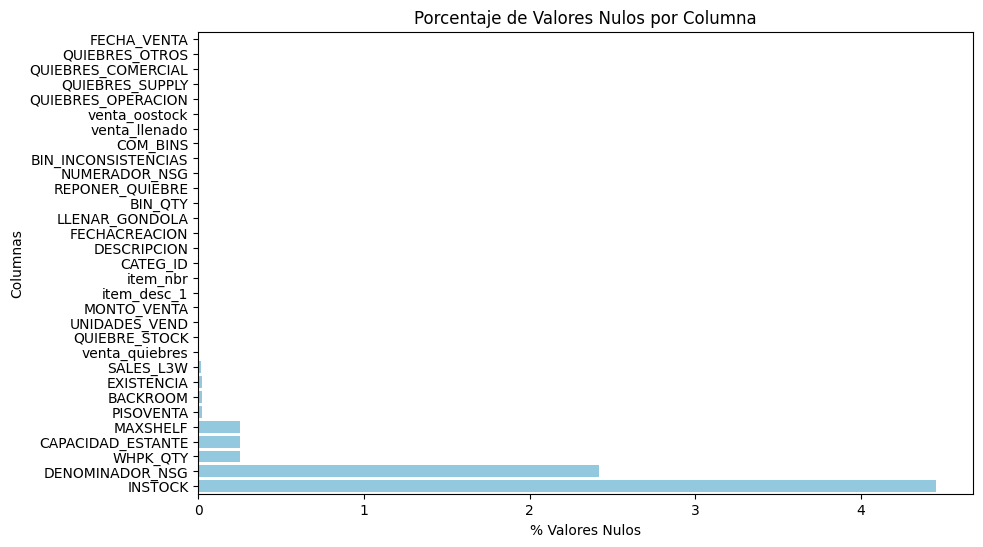

In [9]:
# Crear un DataFrame de ejemplo con valores nulos

# Calcular porcentajes de valores nulos por columna
porcentajes_nulos = df.isnull().mean() * 100
porcentajes_nulos = porcentajes_nulos.sort_values(ascending = True)
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentajes_nulos, y=porcentajes_nulos.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('% Valores Nulos')
plt.ylabel('Columnas')
plt.title('Porcentaje de Valores Nulos por Columna')

# Mostrar el gráfico
plt.show()

In [10]:
df.shape

(90166, 31)

In [11]:
df = df.dropna(how='all', axis = 1)

In [12]:
df.dtypes

FECHA_VENTA             object
FECHACREACION           object
DESCRIPCION             object
CATEG_ID                object
item_nbr                 int64
item_desc_1             object
UNIDADES_VEND            int64
MONTO_VENTA              int64
INSTOCK                float64
MAXSHELF               float64
CAPACIDAD_ESTANTE      float64
EXISTENCIA             float64
QUIEBRE_STOCK            int64
BIN_QTY                  int64
REPONER_QUIEBRE        float64
LLENAR_GONDOLA         float64
PISOVENTA              float64
BACKROOM               float64
BIN_INCONSISTENCIAS      int64
COM_BINS                 int64
WHPK_QTY               float64
SALES_L3W              float64
venta_quiebres         float64
venta_llenado            int64
venta_oostock            int64
QUIEBRES_OPERACION       int64
QUIEBRES_SUPPLY          int64
QUIEBRES_COMERCIAL       int64
QUIEBRES_OTROS           int64
NUMERADOR_NSG            int64
DENOMINADOR_NSG        float64
dtype: object

In [13]:
df['INSTOCK'].describe()

count    86149.000000
mean         0.985873
std          0.118014
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: INSTOCK, dtype: float64

In [14]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df.fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df.fillna(False, inplace=True)


In [15]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df['INSTOCK'].fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df['INSTOCK'].fillna(False, inplace=True)


In [16]:
df['DENOMINADOR_NSG'].describe()

count    90166.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: DENOMINADOR_NSG, dtype: float64

In [17]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df['DENOMINADOR_NSG'].fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df['DENOMINADOR_NSG'].fillna(False, inplace=True)


In [18]:
df['DENOMINADOR_NSG'].describe()

count    90166.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: DENOMINADOR_NSG, dtype: float64

In [19]:
df.rename(columns = {'FECHA_VENTA':'DATE'}, inplace = True)

# Cambiamos el formado de la columna 'date'
df.DATE= pd.DatetimeIndex(df.DATE)
df['DATE'].dtype
# es equivalente a datetime64

dtype('<M8[ns]')

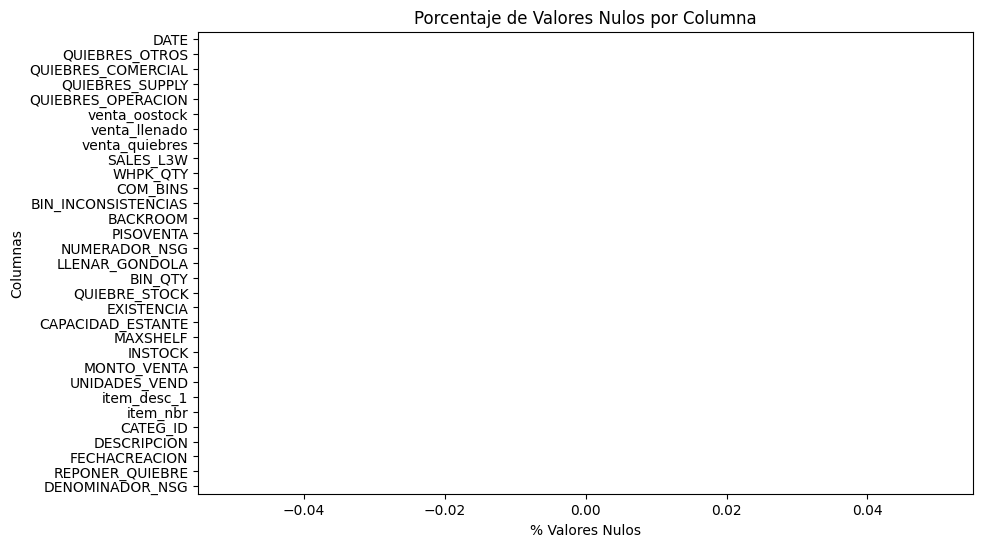

In [20]:
# Crear un DataFrame de ejemplo con valores nulos

# Calcular porcentajes de valores nulos por columna
porcentajes_nulos = df.isnull().mean() * 100
porcentajes_nulos = porcentajes_nulos.sort_values(ascending = True)
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentajes_nulos, y=porcentajes_nulos.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('% Valores Nulos')
plt.ylabel('Columnas')
plt.title('Porcentaje de Valores Nulos por Columna')

# Mostrar el gráfico
plt.show()

In [21]:
df.head()

DATE FECHACREACION                         DESCRIPCION CATEG_ID  \
17 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
22 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
31 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
60 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
49 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   

    item_nbr           item_desc_1  UNIDADES_VEND  MONTO_VENTA  INSTOCK  \
17    240159     QUESO RALLADO 80G             43        47122      1.0   
22    254100  QUESO GOUDA LAMINADO             58       173622      1.0   
31    254112  QUESO GOUDA LAMINADO              5         8723      1.0   
60    254124  QUESO GOUDA LAMINADO              9         8890      1.0   
49    263719         QUESO RALLADO             74        41780      1.0   

    MAXSHELF  ...  SALES_L3W  venta_quiebres  venta_llenado  venta_oostock  \
17       8.0  ...   668087.0             0.0              0              0   
22      81.0  ...  3481916.0             0.0              0              0   
31      72.0  ...   191424.0             0.0              0              0   
60     112.0  ...   143659.0             0.0              0              0   
49    1440.0  ...   584836.0             0.0              0              0   

    QUIEBRES_OPERACION  QUIEBRES_SUPPLY  QUIEBRES_COMERCIAL  QUIEBRES_OTROS  \
17                   0                0                   1               0   
22                   1                0                   0               0   
31                   0                0                   0               0   
60                   0                0                   0               0   
49                   0                0                   0               0   

    NUMERADOR_NSG  DENOMINADOR_NSG  
17              1              1.0  
22              1              1.0  
31              0              1.0  
60              0              1.0  
49              0              1.0  

[5 rows x 31 columns]

In [22]:
df.shape

(90166, 31)

In [23]:
# Podemos reindexar nuestro dataframe 
#df = df.sort_values(by = "DATE")
#df.index = pd.PeriodIndex(df.DATE, freq='D')
#df.head()

In [24]:
#df = df.dropna()

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_78852/2362317380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.drop('UNIDADES_VEND', axis=1).corrwith(df['UNIDADES_VEND'])


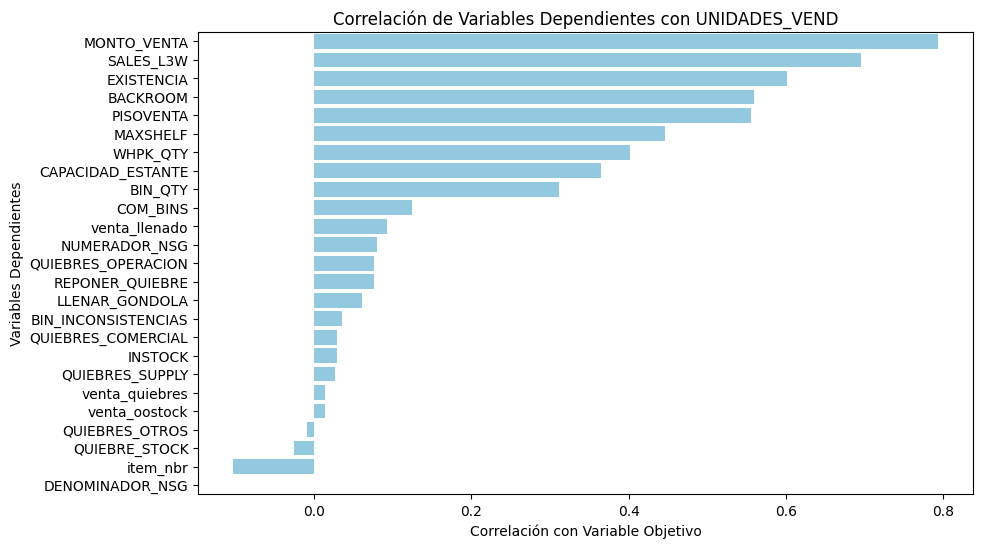

In [25]:
# Calcular la correlación de las variables dependientes con respecto a la variable objetivo
correlaciones = df.drop('UNIDADES_VEND', axis=1).corrwith(df['UNIDADES_VEND'])

# Ordenar las correlaciones de mayor a menor
correlaciones = correlaciones.sort_values(ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=correlaciones, y=correlaciones.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Correlación con Variable Objetivo')
plt.ylabel('Variables Dependientes')
plt.title('Correlación de Variables Dependientes con UNIDADES_VEND')

# Mostrar el gráfico
plt.show()

In [26]:
df_bkp=df

In [27]:
df

DATE FECHACREACION                         DESCRIPCION CATEG_ID  \
17    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
22    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
31    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
60    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
49    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
...          ...           ...                                 ...      ...   
90084 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90090 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90047 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90093 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90022 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   

       item_nbr           item_desc_1  UNIDADES_VEND  MONTO_VENTA  INSTOCK  \
17       240159     QUESO RALLADO 80G             43        47122      1.0   
22       254100  QUESO GOUDA LAMINADO             58       173622      1.0   
31       254112  QUESO GOUDA LAMINADO              5         8723      1.0   
60       254124  QUESO GOUDA LAMINADO              9         8890      1.0   
49       263719         QUESO RALLADO             74        41780      1.0   
...         ...                   ...            ...          ...      ...   
90084   5028517  TABLA QUESO PARRILLE              1         5958      1.0   
90090   5029865  QUESO MANTEC OREGANO              2         7378      1.0   
90047   5029866   QUESO MANTEC MERKEN              1         3689      1.0   
90093   5035128     QUESO GAUDA TROZO              5         9200      1.0   
90022   5042804  QUESO TROZO MANTECOS              8        40272      1.0   

       MAXSHELF  ...  SALES_L3W  venta_quiebres  venta_llenado  venta_oostock  \
17          8.0  ...   668087.0             0.0              0              0   
22         81.0  ...  3481916.0             0.0              0              0   
31         72.0  ...   191424.0             0.0              0              0   
60        112.0  ...   143659.0             0.0              0              0   
49       1440.0  ...   584836.0             0.0              0              0   
...         ...  ...        ...             ...            ...            ...   
90084      48.0  ...   165748.0             0.0              0              0   
90090      12.0  ...   101628.0             0.0              0              0   
90047      12.0  ...    33319.0             0.0              0              0   
90093       0.0  ...    25760.0             0.0              0              0   
90022      24.0  ...   452054.0             0.0              0              0   

       QUIEBRES_OPERACION  QUIEBRES_SUPPLY  QUIEBRES_COMERCIAL  \
17                      0                0                   1   
22                      1                0                   0   
31                      0                0                   0   
60                      0                0                   0   
49                      0                0                   0   
...                   ...              ...                 ...   
90084                   0                0                   0   
90090                   0                0                   0   
90047                   0                0                   0   
90093                   0                0                   0   
90022                   0                0                   0   

       QUIEBRES_OTROS  NUMERADOR_NSG  DENOMINADOR_NSG  
17                  0              1              1.0  
22                  0              1              1.0  
31                  0              0              1.0  
60                  0              0              1.0  
49                  0              0              1.0  
...               ...   

In [28]:
df_heat =df

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_78852/2778871380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_heat.corr())


<Axes: >

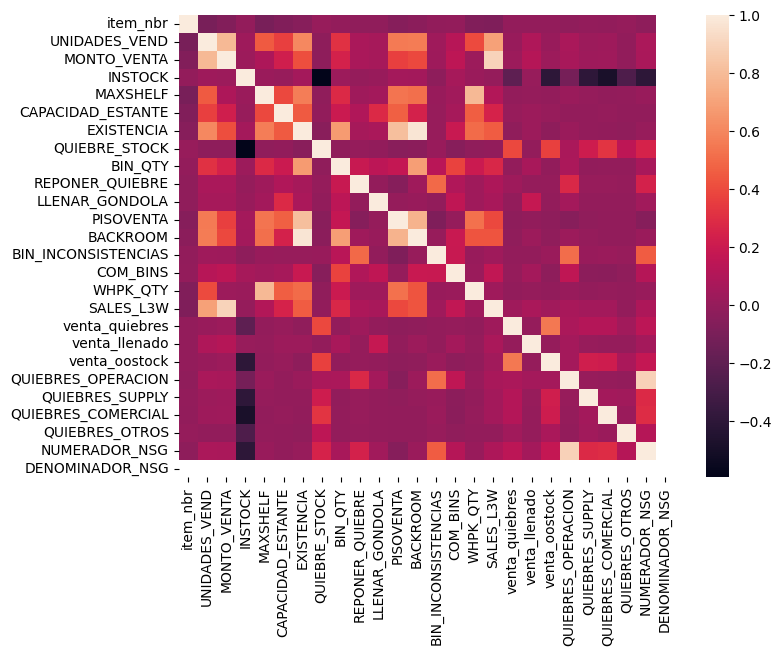

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df_heat.corr())

In [30]:
df_heat

DATE FECHACREACION                         DESCRIPCION CATEG_ID  \
17    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
22    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
31    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
60    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
49    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
...          ...           ...                                 ...      ...   
90084 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90090 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90047 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90093 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90022 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   

       item_nbr           item_desc_1  UNIDADES_VEND  MONTO_VENTA  INSTOCK  \
17       240159     QUESO RALLADO 80G             43        47122      1.0   
22       254100  QUESO GOUDA LAMINADO             58       173622      1.0   
31       254112  QUESO GOUDA LAMINADO              5         8723      1.0   
60       254124  QUESO GOUDA LAMINADO              9         8890      1.0   
49       263719         QUESO RALLADO             74        41780      1.0   
...         ...                   ...            ...          ...      ...   
90084   5028517  TABLA QUESO PARRILLE              1         5958      1.0   
90090   5029865  QUESO MANTEC OREGANO              2         7378      1.0   
90047   5029866   QUESO MANTEC MERKEN              1         3689      1.0   
90093   5035128     QUESO GAUDA TROZO              5         9200      1.0   
90022   5042804  QUESO TROZO MANTECOS              8        40272      1.0   

       MAXSHELF  ...  SALES_L3W  venta_quiebres  venta_llenado  venta_oostock  \
17          8.0  ...   668087.0             0.0              0              0   
22         81.0  ...  3481916.0             0.0              0              0   
31         72.0  ...   191424.0             0.0              0              0   
60        112.0  ...   143659.0             0.0              0              0   
49       1440.0  ...   584836.0             0.0              0              0   
...         ...  ...        ...             ...            ...            ...   
90084      48.0  ...   165748.0             0.0              0              0   
90090      12.0  ...   101628.0             0.0              0              0   
90047      12.0  ...    33319.0             0.0              0              0   
90093       0.0  ...    25760.0             0.0              0              0   
90022      24.0  ...   452054.0             0.0              0              0   

       QUIEBRES_OPERACION  QUIEBRES_SUPPLY  QUIEBRES_COMERCIAL  \
17                      0                0                   1   
22                      1                0                   0   
31                      0                0                   0   
60                      0                0                   0   
49                      0                0                   0   
...                   ...              ...                 ...   
90084                   0                0                   0   
90090                   0                0                   0   
90047                   0                0                   0   
90093                   0                0                   0   
90022                   0                0                   0   

       QUIEBRES_OTROS  NUMERADOR_NSG  DENOMINADOR_NSG  
17                  0              1              1.0  
22                  0              1              1.0  
31                  0              0              1.0  
60                  0              0              1.0  
49                  0              0              1.0  
...               ...   

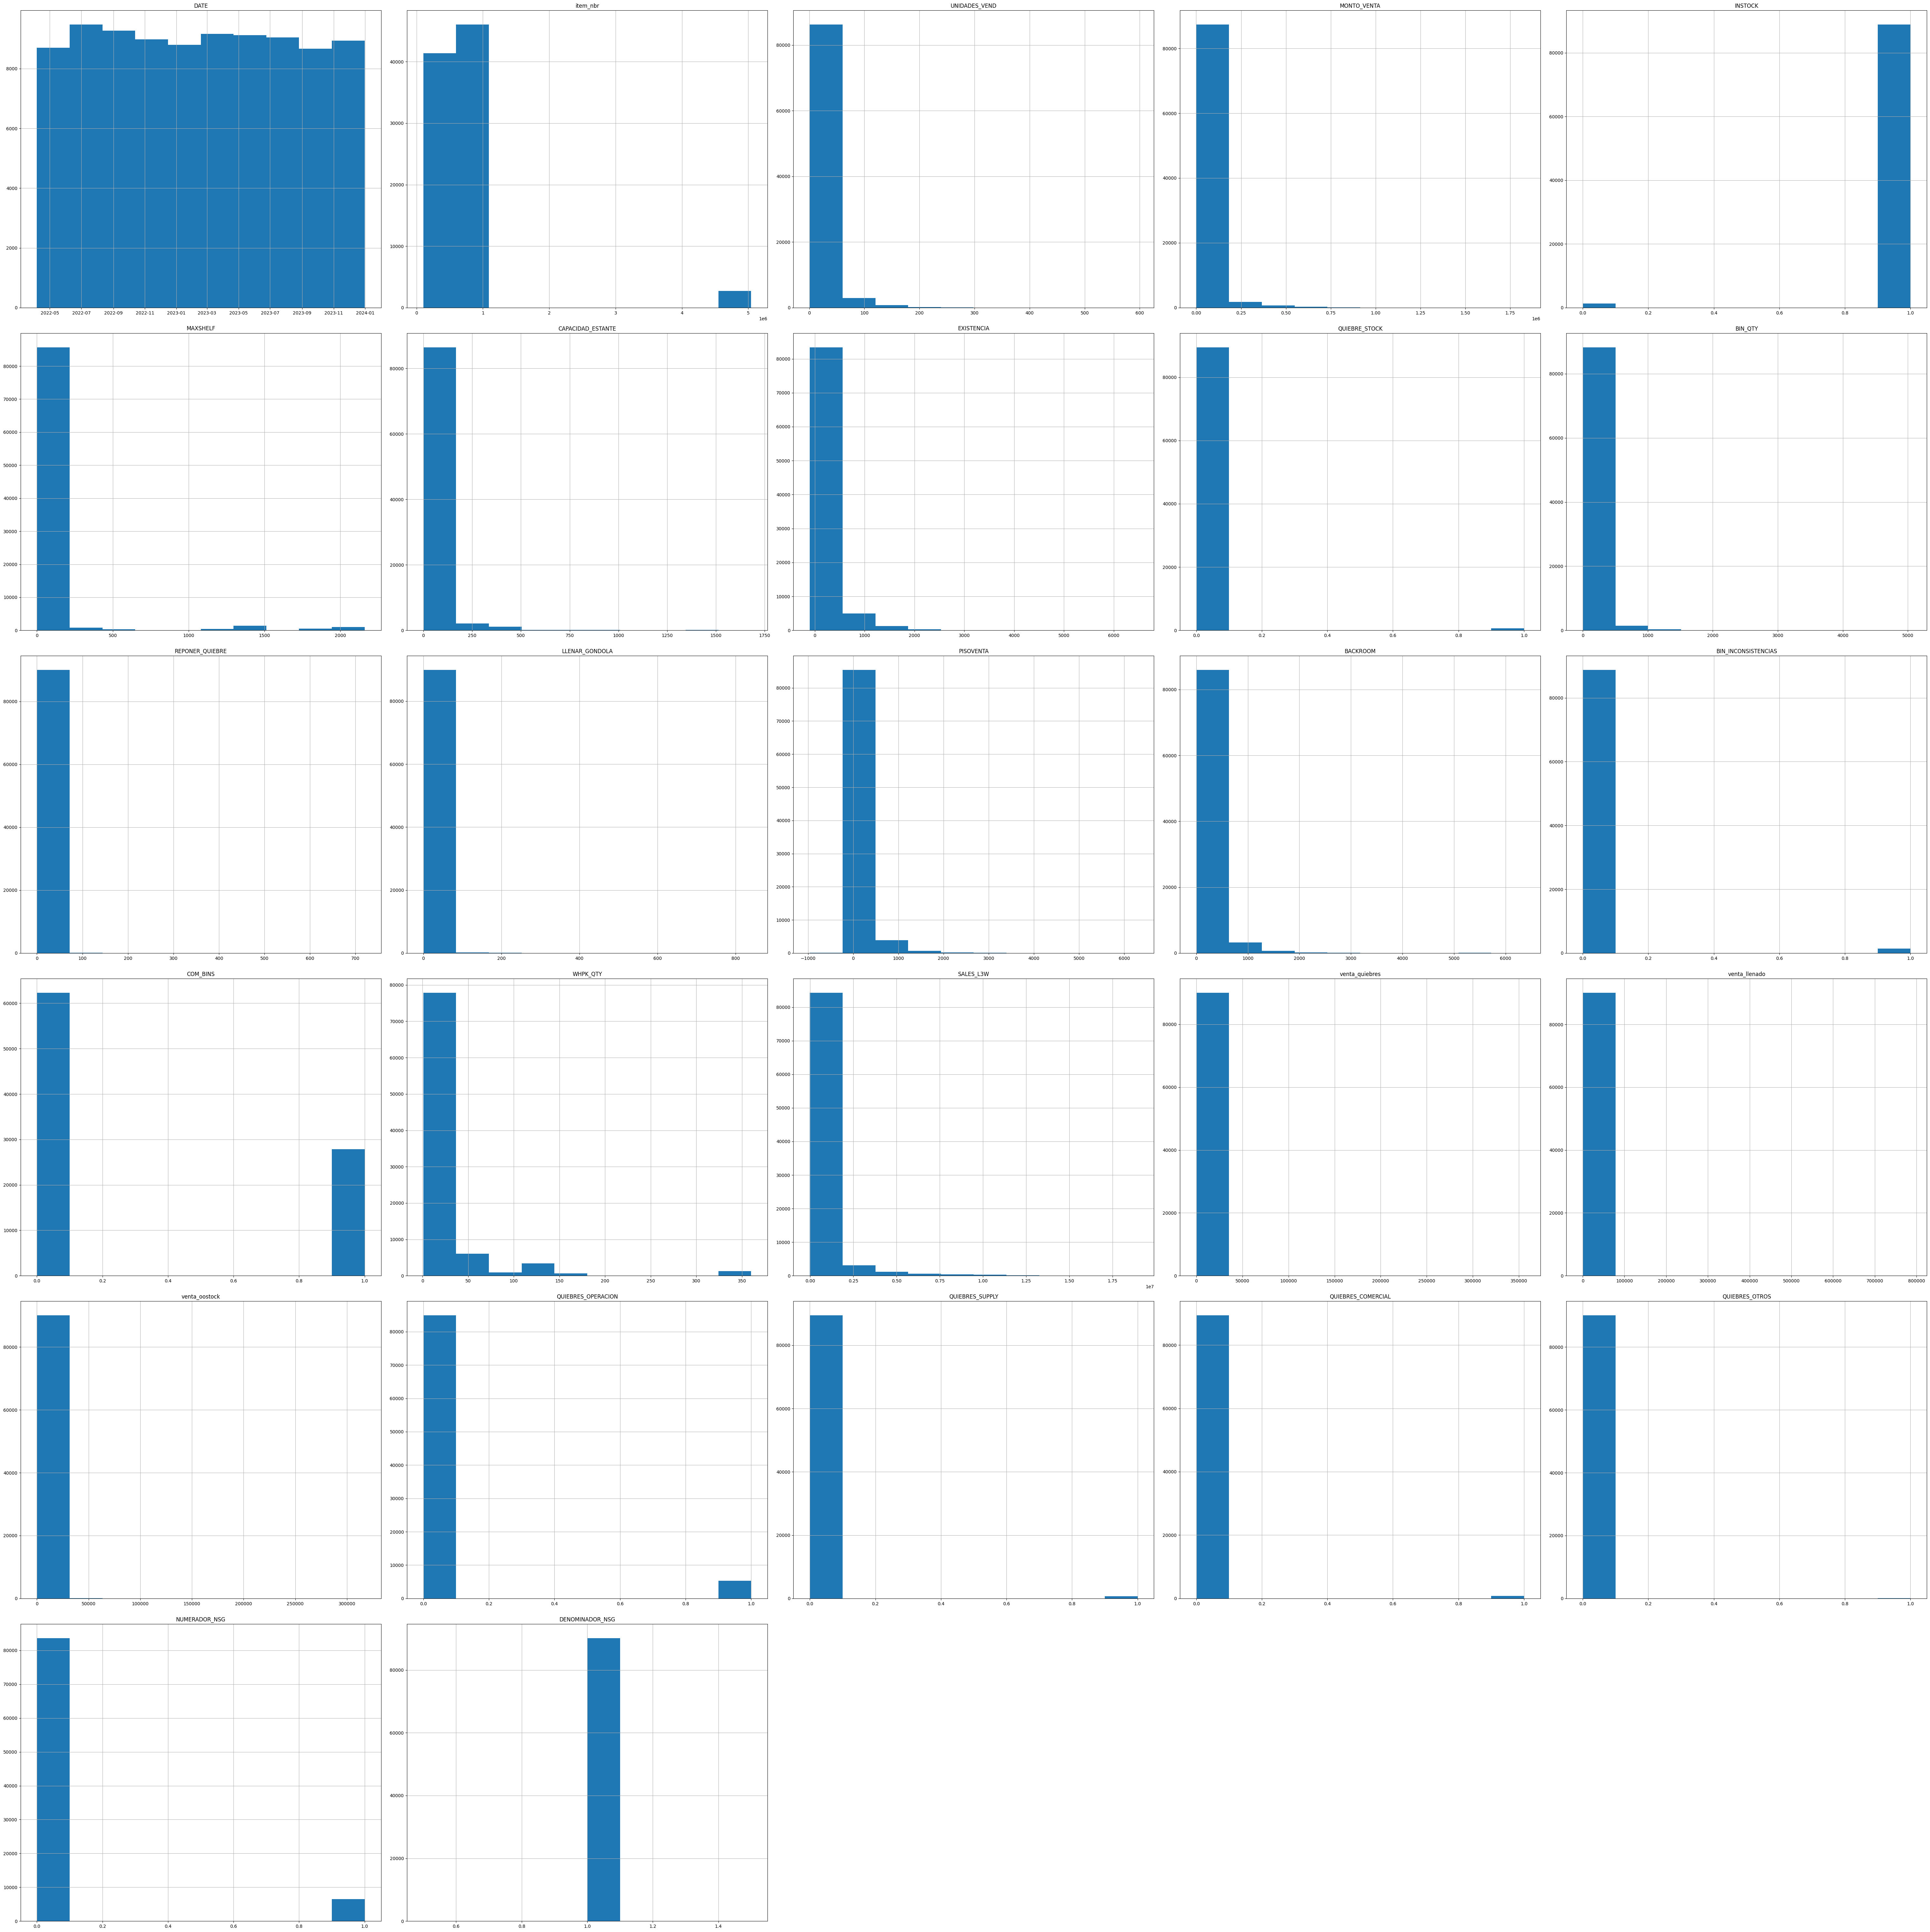

In [31]:
df_heat.hist(figsize=(60,60)) 
plt.tight_layout()
plt.show()

<Axes: xlabel='UNIDADES_VEND', ylabel='Density'>

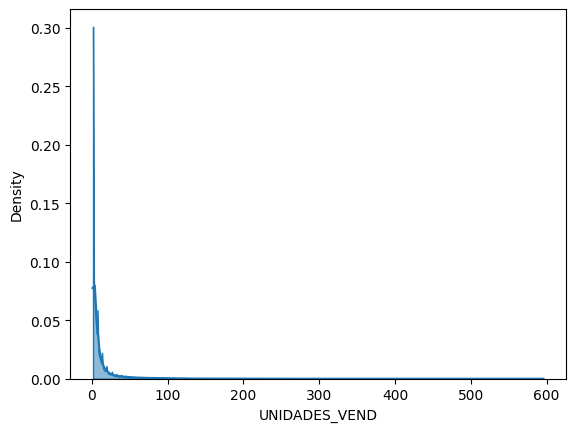

In [32]:
x = df_heat['UNIDADES_VEND']
sns.histplot(x = x,  kde=True, stat="density", bins=500, element = "poly" )

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_78852/3384153857.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


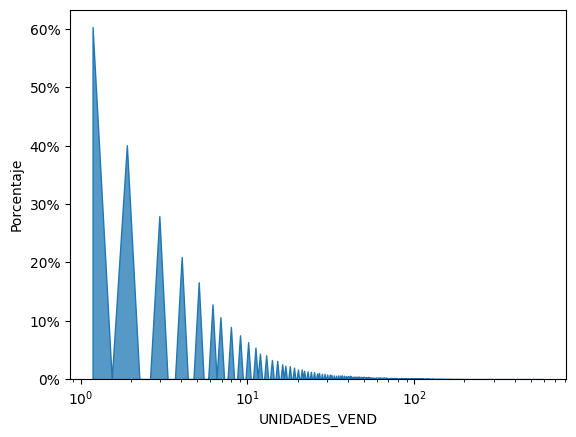

In [33]:
x = df_heat['UNIDADES_VEND']

# Crear el gráfico de distribución con seaborn
sns.histplot(x=x, stat="density", element="poly")

# Configurar el eje x en escala logarítmica
plt.xscale('log')

# Cambiar el eje y a porcentaje
plt.ylabel('Porcentaje')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Mostrar el gráfico
plt.show()

In [34]:
df['UNIDADES_VEND'].describe()

count    90166.000000
mean        11.925759
std         24.104604
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        596.000000
Name: UNIDADES_VEND, dtype: float64

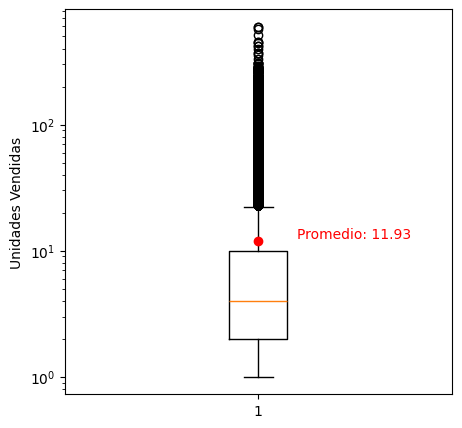

In [35]:
import numpy as np
import matplotlib.pyplot as plt


# Crear el boxplot
plt.figure(figsize=(5,5))
plt.boxplot(df['UNIDADES_VEND'])

# Configurar la escala del eje y en logarítmica
plt.yscale('log')

# Etiquetar el eje y como "Unidades Vendidas"
plt.ylabel('Unidades Vendidas')

# Calcular el promedio y agregar su valor numérico y marcador en el boxplot
promedio = df['UNIDADES_VEND'].mean()
plt.text(1.1, promedio, f'Promedio: {promedio:.2f}', color='red', fontsize=10, verticalalignment='bottom')
plt.plot(1, promedio, 'ro')  # Añadir marcador en el boxplot

# Mostrar el boxplot
plt.show()

In [36]:
df = df_bkp

In [37]:
agg_item_df = df.groupby(['DATE', 'item_nbr', 'item_desc_1']).agg({'UNIDADES_VEND':'sum'}).reset_index().sort_values(['UNIDADES_VEND'], ascending = False)

In [38]:
agg_item_df.head()

DATE  item_nbr           item_desc_1  UNIDADES_VEND
56670 2023-05-08    276563  QUESO PARMESANO RALL            596
31920 2022-11-14    581716  Q. MANT R BUENO L500            591
74496 2023-09-09    276563  QUESO PARMESANO RALL            577
31477 2022-11-11    581716  Q. MANT R BUENO L500            509
74654 2023-09-10    276563  QUESO PARMESANO RALL            451

In [39]:
agg_item_df_254100 =  agg_item_df[agg_item_df.item_nbr.isin([254100])]
agg_item_df_254100.head(10)

DATE  item_nbr           item_desc_1  UNIDADES_VEND
35143 2022-12-07    254100  QUESO GOUDA LAMINADO            238
68753 2023-08-01    254100  QUESO GOUDA LAMINADO            200
71671 2023-08-21    254100  QUESO GOUDA LAMINADO            194
36881 2022-12-19    254100  QUESO GOUDA LAMINADO            193
71822 2023-08-22    254100  QUESO GOUDA LAMINADO            188
23039 2022-09-12    254100  QUESO GOUDA LAMINADO            187
23507 2022-09-15    254100  QUESO GOUDA LAMINADO            185
69641 2023-08-07    254100  QUESO GOUDA LAMINADO            184
55734 2023-05-02    254100  QUESO GOUDA LAMINADO            180
84234 2023-11-20    254100  QUESO GOUDA LAMINADO            179

In [40]:
agg_item_df_254100 = agg_item_df_254100.sort_values(['DATE']).reset_index(drop=True)


In [41]:
df_media = agg_item_df_254100

In [42]:

# Extraer el mes y el año de la columna de fecha
df_media['MES'] = df_media['DATE'].dt.month
df_media['AÑO'] = df_media['DATE'].dt.year

# Agrupar por producto, año y mes, y calcular la suma de la cantidad vendida
ventas_por_mes = df_media.groupby(['AÑO'])['UNIDADES_VEND'].mean().reset_index()



ventas_por_mes

AÑO  UNIDADES_VEND
0  2022      86.712121
1  2023      83.420613

In [43]:
agg_item_df_254100['UNIDADES_VEND'].describe()

count    623.000000
mean      84.815409
std       37.274936
min        1.000000
25%       59.000000
50%       83.000000
75%      107.000000
max      238.000000
Name: UNIDADES_VEND, dtype: float64

In [44]:
df_254100 = agg_item_df_254100
df_254100.head(10)

DATE  item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO
0 2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022
1 2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022
2 2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022
3 2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022
4 2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022
5 2022-04-11    254100  QUESO GOUDA LAMINADO            100    4  2022
6 2022-04-12    254100  QUESO GOUDA LAMINADO             82    4  2022
7 2022-04-13    254100  QUESO GOUDA LAMINADO             64    4  2022
8 2022-04-14    254100  QUESO GOUDA LAMINADO             75    4  2022
9 2022-04-15    254100  QUESO GOUDA LAMINADO             39    4  2022

In [45]:
df_254100.UNIDADES_VEND.describe()

count    623.000000
mean      84.815409
std       37.274936
min        1.000000
25%       59.000000
50%       83.000000
75%      107.000000
max      238.000000
Name: UNIDADES_VEND, dtype: float64

In [46]:
df_254100.dtypes

DATE             datetime64[ns]
item_nbr                  int64
item_desc_1              object
UNIDADES_VEND             int64
MES                       int64
AÑO                       int64
dtype: object

In [47]:
#adding holiday data

holiday = pd.DataFrame([])


for date_, name in sorted(holidays.CL(years=[2021, 2022, 2023, 2024]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "CL-Holidays", 'lower_window': -2, 'upper_window':0}, index=[0])], ignore_index=True) 

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday

ds      holiday  lower_window  upper_window
0  2021-01-01  CL-Holidays            -2             0
1  2021-04-02  CL-Holidays            -2             0
2  2021-04-03  CL-Holidays            -2             0
3  2021-05-01  CL-Holidays            -2             0
4  2021-05-21  CL-Holidays            -2             0
..        ...          ...           ...           ...
63 2024-10-12  CL-Holidays            -2             0
64 2024-10-31  CL-Holidays            -2             0
65 2024-11-01  CL-Holidays            -2             0
66 2024-12-08  CL-Holidays            -2             0
67 2024-12-25  CL-Holidays            -2             0

[68 rows x 4 columns]

In [48]:
#setting variables
feature = 'UNIDADES_VEND'
prediction_days = 60

In [49]:
#Variables

forecast_start_dt = date(2023,12,1) #data set ends of (2023,8,31)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2023-12-01


In [50]:
#PROPHET MODEL

df_copy = df_254100.copy()
df_copy = df_copy.rename(columns={'DATE': 'ds', feature: 'y'})
df_copy = df_copy.drop(['item_nbr', 'item_desc_1'], axis=1)
df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

df_copy['ds'] = pd.to_datetime(df_copy['ds'])

train_set = df_copy[(df_copy['ds'] < forecast_start_date) ]

m = Prophet(holidays=holiday, changepoint_prior_scale = 0.1, seasonality_prior_scale= 0.1, weekly_seasonality= True).fit(train_set)

future = m.make_future_dataframe(periods=31)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

20:00:08 - cmdstanpy - INFO - Chain [1] start processing
20:00:08 - cmdstanpy - INFO - Chain [1] done processing


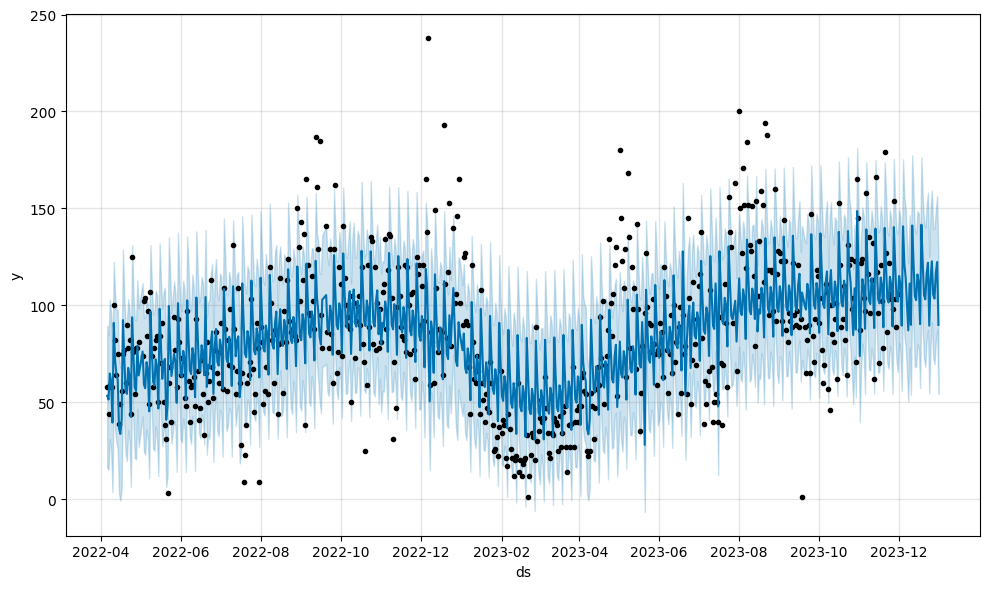

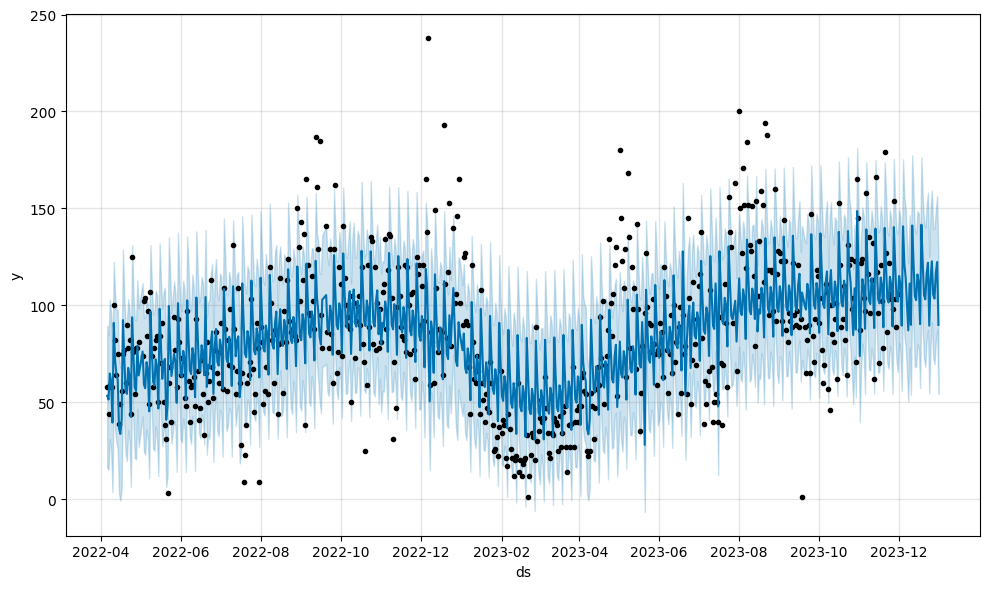

In [51]:
m.plot(fcst_prophet_train)

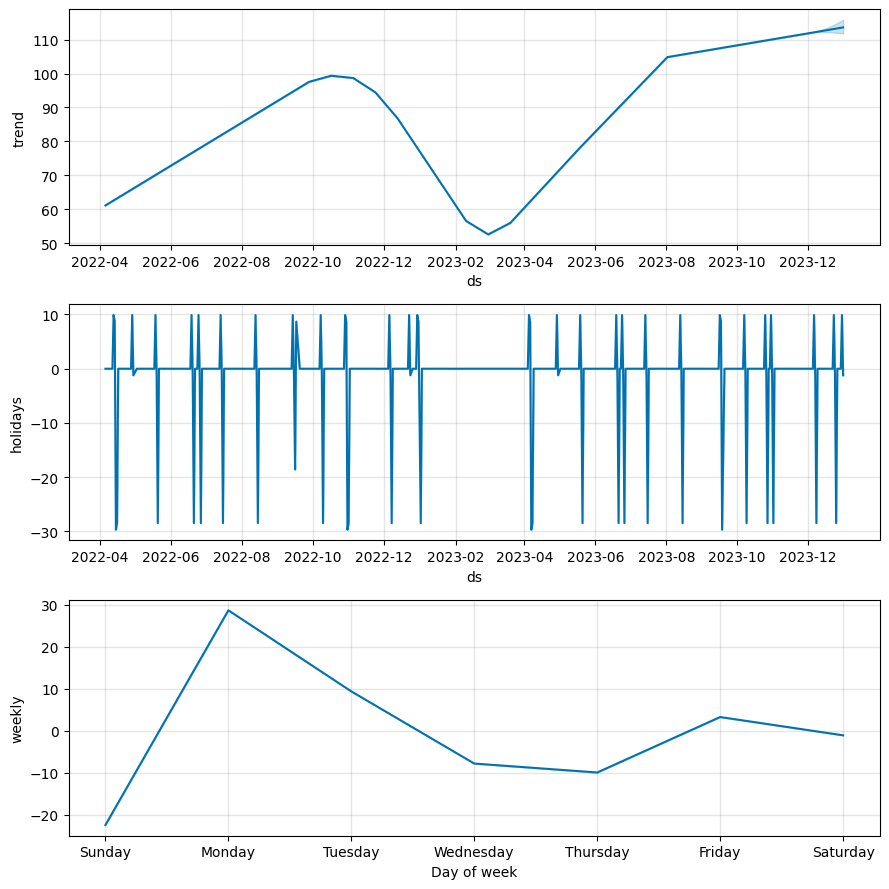

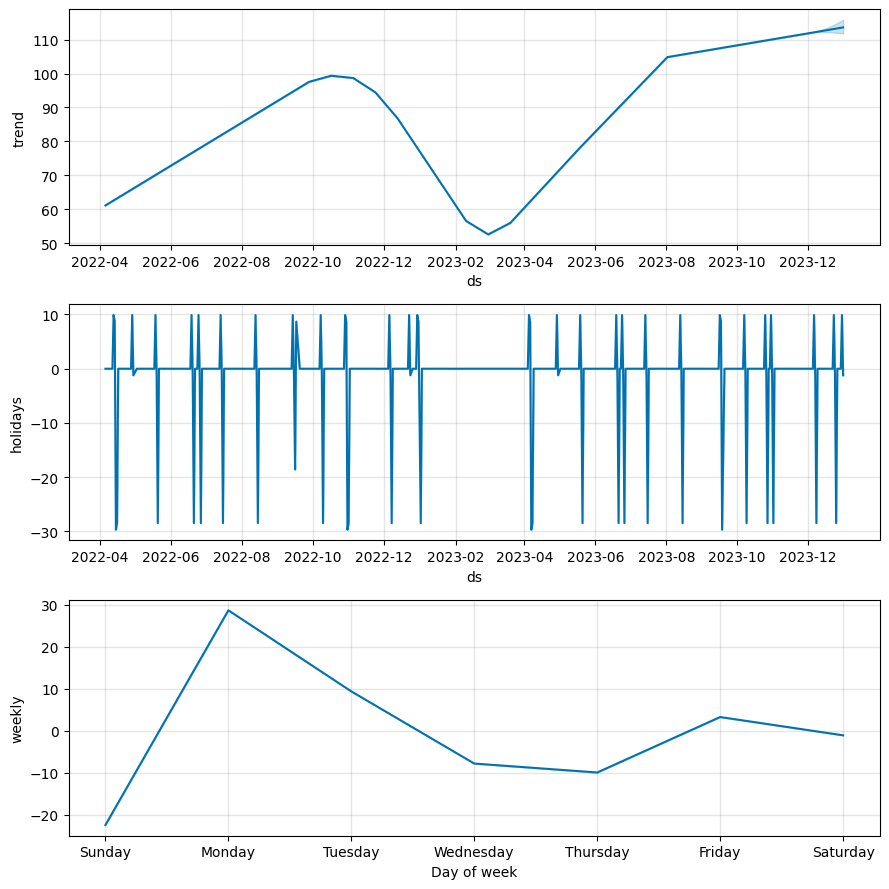

In [52]:
m.plot_components(fcst_prophet_train)



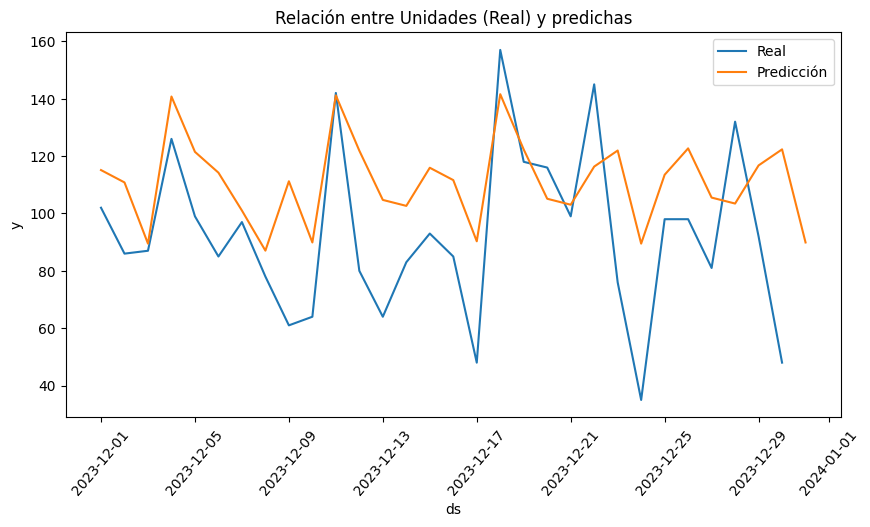

In [53]:
x = predicted_df.ds
y1 = df_copy['y']
fig, ax = plt.subplots(figsize=(10, 5))
y2 = predicted_df['yhat']
sns.lineplot(x = x, y = y1, data = predicted_df , label='Real')
sns.lineplot(x = x, y = y2, data = predicted_df, label='Predicción')
plt.xticks(rotation=50)


# Añadir título
plt.title('Relación entre Unidades (Real) y predichas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [54]:
predicted_df = predicted_df.merge(df_copy)

In [55]:
predicted_df.dtypes

ds      datetime64[ns]
yhat           float64
y                int64
MES              int64
AÑO              int64
dtype: object

In [56]:
df_copy.dtypes

ds     datetime64[ns]
y               int64
MES             int64
AÑO             int64
dtype: object

In [57]:
predicted_df

ds        yhat    y  MES   AÑO
0  2023-12-01  115.124170  102   12  2023
1  2023-12-02  110.818243   86   12  2023
2  2023-12-03   89.486515   87   12  2023
3  2023-12-04  140.760216  126   12  2023
4  2023-12-05  121.472437   99   12  2023
5  2023-12-06  114.221743   85   12  2023
6  2023-12-07  101.022591   97   12  2023
7  2023-12-08   87.044053   78   12  2023
8  2023-12-09  111.223633   61   12  2023
9  2023-12-10   89.891904   64   12  2023
10 2023-12-11  141.165605  142   12  2023
11 2023-12-12  121.877826   80   12  2023
12 2023-12-13  104.721810   64   12  2023
13 2023-12-14  102.644153   83   12  2023
14 2023-12-15  115.934949   93   12  2023
15 2023-12-16  111.629022   85   12  2023
16 2023-12-17   90.297293   48   12  2023
17 2023-12-18  141.570994  157   12  2023
18 2023-12-19  122.283215  118   12  2023
19 2023-12-20  105.127200  116   12  2023
20 2023-12-21  103.049543   99   12  2023
21 2023-12-22  116.340338  145   12  2023
22 2023-12-23  121.939733   76   12  2023
23 2023-12-24   89.486510   35   12  2023
24 2023-12-26  122.688605   98   12  2023
25 2023-12-27  105.532589   98   12  2023
26 2023-12-28  103.454932   81   12  2023
27 2023-12-29  116.745727  132   12  2023
28 2023-12-30  122.345122   92   12  2023
29 2023-12-31   89.891899   48   12  2023

In [58]:
mape(predicted_df['y'], predicted_df['yhat'])


33.04904805874974

In [59]:
RMSE(predicted_df['y'], predicted_df['yhat'])

27.60150644241516

In [60]:
from sklearn.metrics import r2_score
r2_score(predicted_df['y'], predicted_df['yhat'])

0.06474497241041144

In [61]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='500 days', period='30 days', horizon = '30 days')

20:00:10 - cmdstanpy - INFO - Chain [1] start processing
20:00:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:00:10 - cmdstanpy - INFO - Chain [1] start processing
20:00:11 - cmdstanpy - INFO - Chain [1] done processing
20:00:11 - cmdstanpy - INFO - Chain [1] start processing
20:00:11 - cmdstanpy - INFO - Chain [1] done processing
20:00:11 - cmdstanpy - INFO - Chain [1] start processing
20:00:11 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
df_p = performance_metrics(df_cv)
df_p[['horizon','rmse']]

horizon       rmse
0   3 days  29.592039
1   4 days  28.622979
2   5 days  24.485100
3   6 days  22.441468
4   7 days  25.613574
5   8 days  44.353139
6   9 days  43.183896
7  10 days  37.071200
8  11 days  26.600679
9  12 days  29.997793
10 13 days  28.250570
11 14 days  25.205762
12 15 days  23.328472
13 16 days  24.088504
14 17 days  59.237219
15 18 days  58.700592
16 19 days  58.722583
17 20 days  32.794303
18 21 days  37.981120
19 22 days  37.050077
20 23 days  31.406908
21 24 days  24.178208
22 25 days  27.538705
23 26 days  31.643978
24 27 days  30.551934
25 28 days  26.815211
26 29 days  22.413585
27 30 days  19.937249

In [63]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y'] 

df_cv.sort_values('mape',ascending=False).head(10)

ds        yhat  yhat_lower  yhat_upper    y     cutoff       mape  \
78 2023-11-20  143.941903  101.925781  182.645548  179 2023-10-31  19.585529   
66 2023-11-08  108.709105   68.760486  146.182104  135 2023-10-31  19.474737   
71 2023-11-13  142.442849  103.389630  180.305120  166 2023-10-31  14.191055   
60 2023-11-02  105.223856   64.742074  141.908491  122 2023-10-31  13.750938   
69 2023-11-11  115.797373   76.254569  155.456492  132 2023-10-31  12.274717   
64 2023-11-06  140.943795  103.449508  180.958384  158 2023-10-31  10.795066   
81 2023-11-23  109.721017   71.561541  151.458297  122 2023-10-31  10.064740   
57 2023-10-30  152.094001  115.417706  189.946990  165 2023-10-01   7.821818   
58 2023-10-31  135.655129   96.532139  174.793539  145 2023-10-01   6.444739   
85 2023-11-27  145.440956  106.473398  182.515713  154 2023-10-31   5.557821   

    overestimate  
78         False  
66         False  
71         False  
60         False  
69         False  
64         False  
81         False  
57         False  
58         False  
85         False

In [64]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'weekly_seasonality':[14],
    'yearly_seasonality':[2],
    'holidays_prior_scale': [0.00001]
    
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='570 days', period='28 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

20:00:11 - cmdstanpy - INFO - Chain [1] start processing
20:00:11 - cmdstanpy - INFO - Chain [1] done processing
20:00:12 - cmdstanpy - INFO - Chain [1] start processing
20:00:12 - cmdstanpy - INFO - Chain [1] done processing
20:00:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:00:12 - cmdstanpy - INFO - Chain [1] start processing
20:00:13 - cmdstanpy - INFO - Chain [1] done processing
20:00:13 - cmdstanpy - INFO - Chain [1] start processing
20:00:13 - cmdstanpy - INFO - Chain [1] done processing
20:00:14 - cmdstanpy - INFO - Chain [1] start processing
20:00:14 - cmdstanpy - INFO - Chain [1] done processing
20:00:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:00:14 - cmdstanpy - INFO - Chain [1] start processing
20:00:15 - cmdstanpy - INFO - Chain [1] done processing
20:00:15 -

In [65]:
len(rmses)

16

In [66]:
tuning_results.sort_values('rmse') 

changepoint_prior_scale  seasonality_prior_scale  weekly_seasonality  \
3                     0.001                    10.00                  14   
5                     0.010                     0.10                  14   
1                     0.001                     0.10                  14   
2                     0.001                     1.00                  14   
7                     0.010                    10.00                  14   
6                     0.010                     1.00                  14   
9                     0.100                     0.10                  14   
10                    0.100                     1.00                  14   
11                    0.100                    10.00                  14   
8                     0.100                     0.01                  14   
4                     0.010                     0.01                  14   
0                     0.001                     0.01                  14   
12                    0.500                     0.01                  14   
13                    0.500                     0.10                  14   
14                    0.500                     1.00                  14   
15                    0.500                    10.00                  14   

    yearly_seasonality  holidays_prior_scale       rmse  
3                    2               0.00001  17.437411  
5                    2               0.00001  17.489602  
1                    2               0.00001  17.491076  
2                    2               0.00001  17.547412  
7                    2               0.00001  17.562366  
6                    2               0.00001  17.638138  
9                    2               0.00001  18.029800  
10                   2               0.00001  18.040781  
11                   2               0.00001  18.048880  
8                    2               0.00001  19.188735  
4                    2               0.00001  19.418806  
0                    2               0.00001  19.625614  
12                   2               0.00001  21.308498  
13                   2               0.00001  32.483604  
14                   2               0.00001  38.667140  
15                   2               0.00001  39.247620

In [67]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale     0.001000
seasonality_prior_scale    10.000000
weekly_seasonality         14.000000
yearly_seasonality          2.000000
holidays_prior_scale        0.000010
rmse                       17.437411
Name: 0, dtype: float64

In [68]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])


{'changepoint_prior_scale': 0.001,
 'seasonality_prior_scale': 10.0,
 'weekly_seasonality': 14.0,
 'yearly_seasonality': 2.0,
 'holidays_prior_scale': 1e-05,
 'rmse': 17.437411127145193}

In [69]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = 0.001, 
            seasonality_prior_scale = 9.9,
            holidays_prior_scale = 0.00002,
            weekly_seasonality= 14,
            yearly_seasonality= 2,
           holidays =holiday)

In [70]:
m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]



20:00:35 - cmdstanpy - INFO - Chain [1] start processing
20:00:36 - cmdstanpy - INFO - Chain [1] done processing


In [71]:

predicted_df = predicted_df.merge(df_copy)

In [72]:
RMSE(predicted_df['y'], predicted_df['yhat'])

24.399342220348277

In [74]:
mape(predicted_df['y'], predicted_df['yhat'])

27.987543646370327

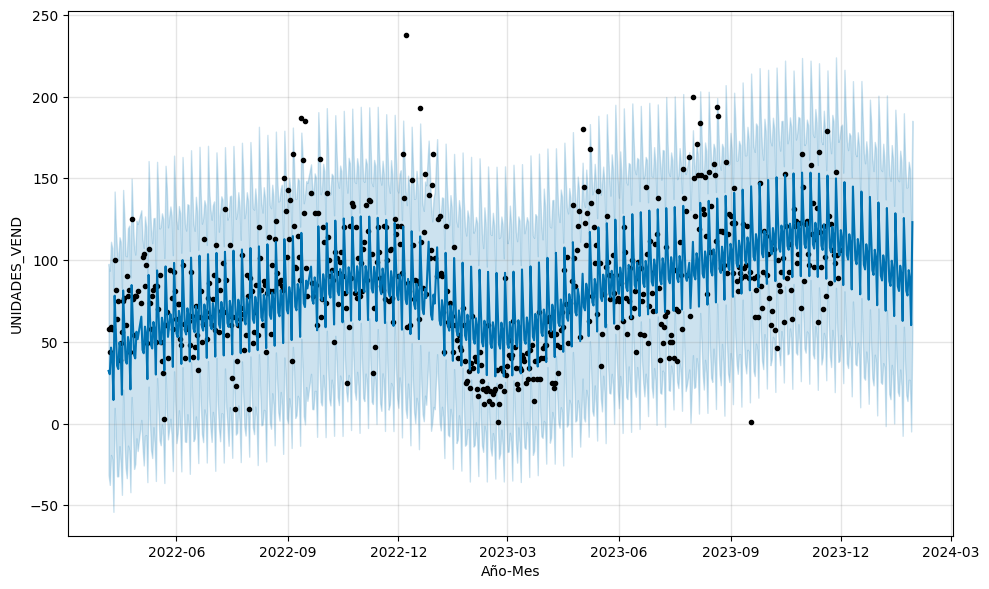

In [75]:
m.plot(fcst_prophet_train)

# Etiquetas personalizadas para los ejes
plt.xlabel('Año-Mes')
plt.ylabel('UNIDADES_VEND')

# Mostrar el gráfico
plt.show()


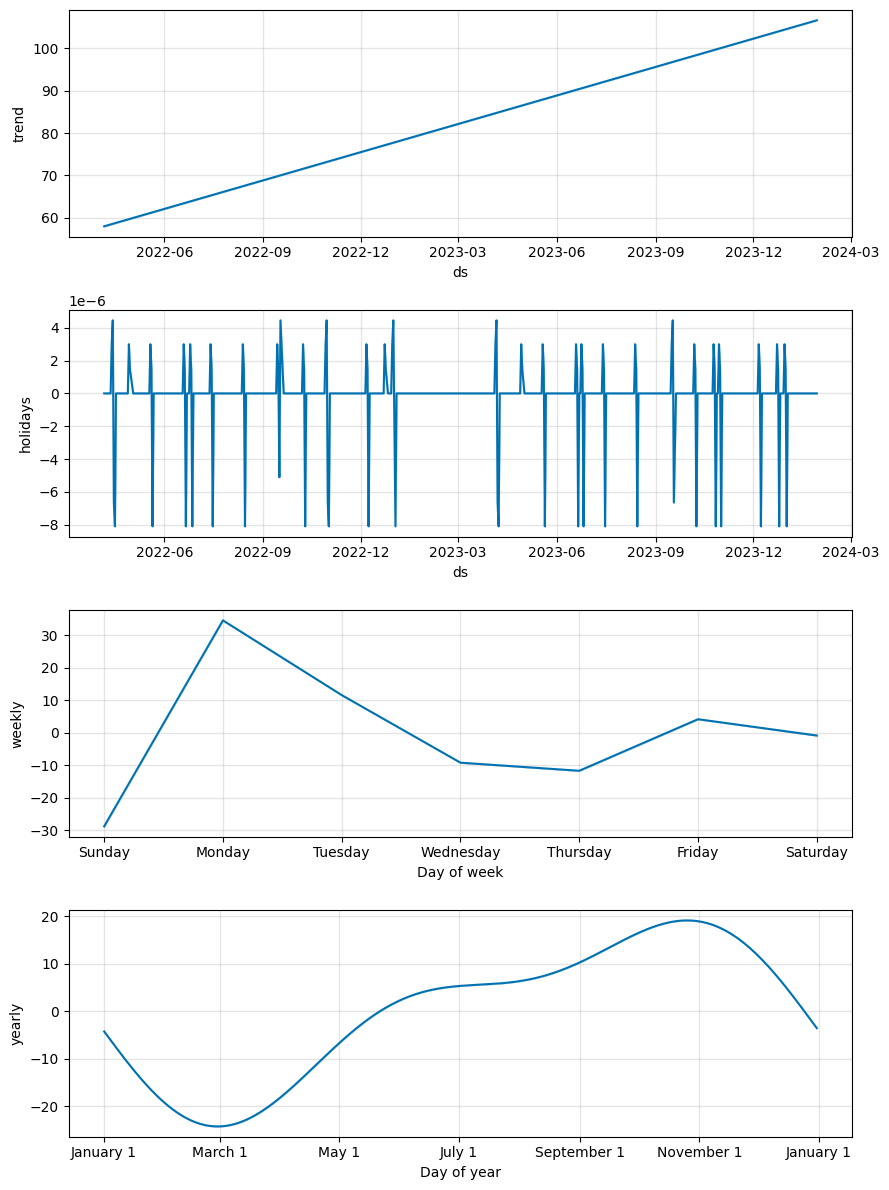

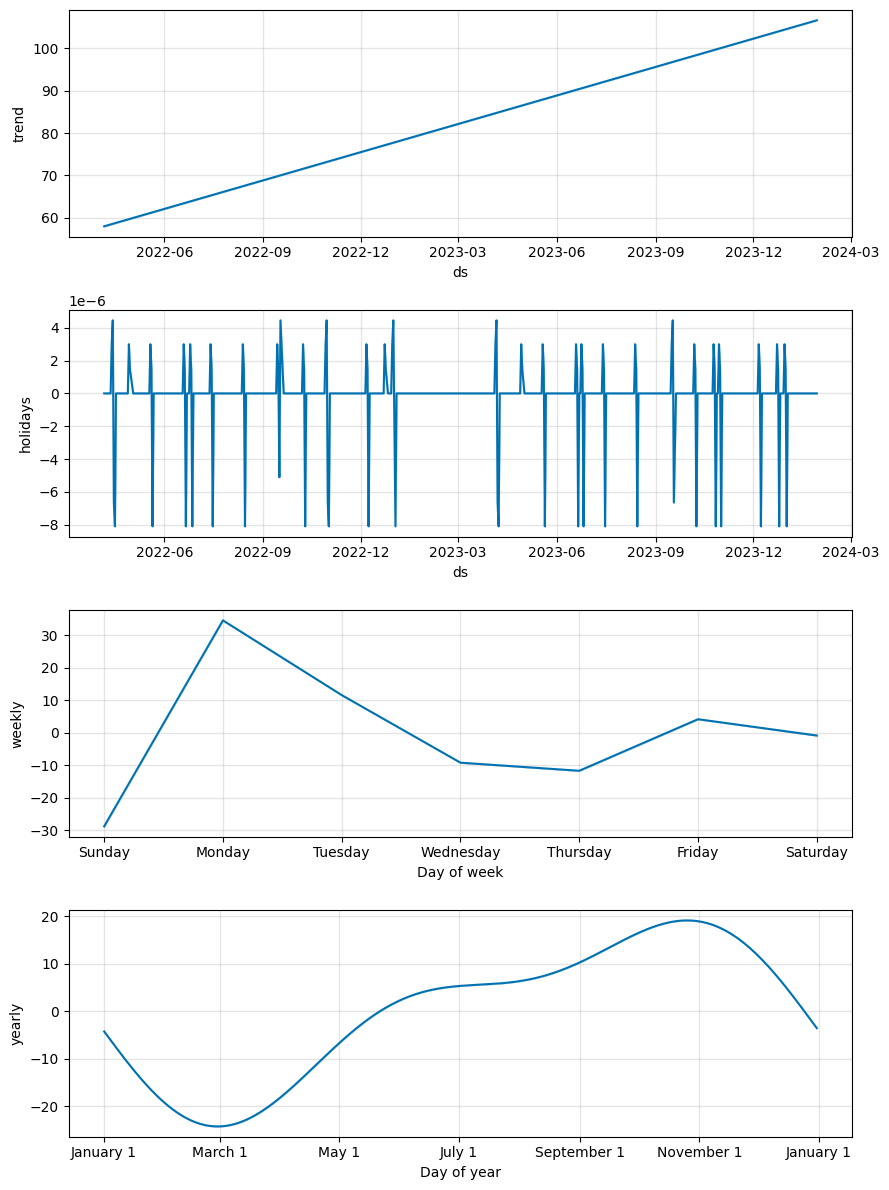

In [76]:
m.plot_components(fcst_prophet_train)


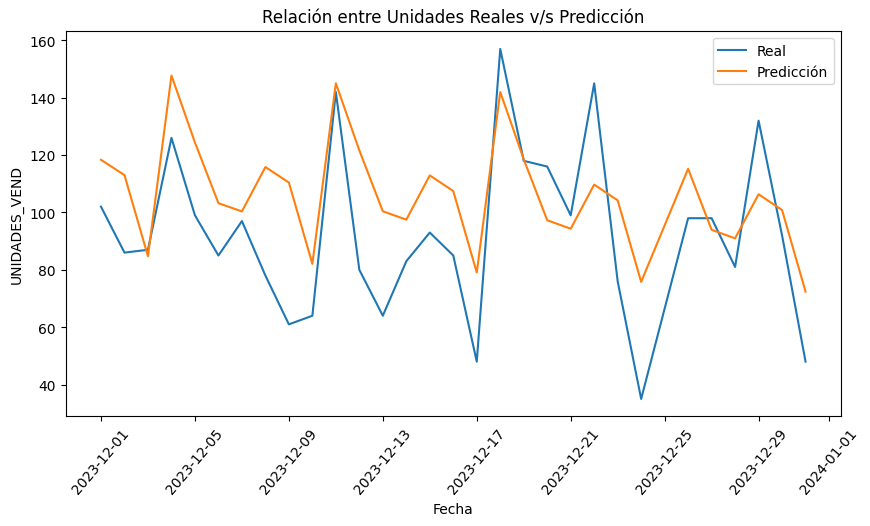

In [77]:
x = predicted_df.ds
y1 = predicted_df['y']
fig, ax = plt.subplots(figsize=(10, 5))
y2 = predicted_df['yhat']
sns.lineplot(x = x, y = y1, data = predicted_df , label='Real')
sns.lineplot(x = x, y = y2, data = predicted_df, label='Predicción')
plt.xticks(rotation=50)


# Añadir título
plt.title('Relación entre Unidades Reales v/s Predicción')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)
plt.xlabel('Fecha')
plt.ylabel('UNIDADES_VEND')
# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [78]:
df = agg_item_df_254100

In [79]:
df.shape

(623, 6)

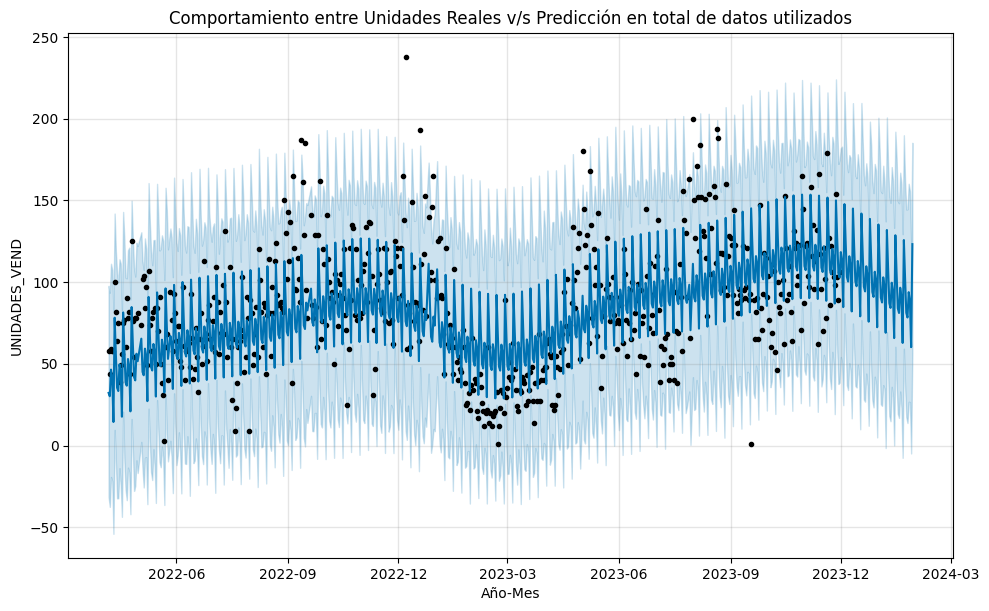

In [80]:
m.plot(fcst_prophet_train)

# Etiquetas personalizadas para los ejes
plt.title('Comportamiento entre Unidades Reales v/s Predicción en total de datos utilizados')
plt.xlabel('Año-Mes')
plt.ylabel('UNIDADES_VEND')

# Mostrar el gráfico
plt.show()

In [81]:

df.head(10)

DATE  item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO
0 2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022
1 2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022
2 2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022
3 2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022
4 2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022
5 2022-04-11    254100  QUESO GOUDA LAMINADO            100    4  2022
6 2022-04-12    254100  QUESO GOUDA LAMINADO             82    4  2022
7 2022-04-13    254100  QUESO GOUDA LAMINADO             64    4  2022
8 2022-04-14    254100  QUESO GOUDA LAMINADO             75    4  2022
9 2022-04-15    254100  QUESO GOUDA LAMINADO             39    4  2022

## 2) Modelos básicos para prónosticos
* Modelo de la media constante
* Modelo de tendencia lineal
* Modelo Random Walk


La serie que vamos a intentar predecir con los siguientes modelos es la cantidad de productos a vender para la tienda 88. 

## 2.a) Media constante

In [82]:
# Calculamos el promedio, uniforme para todos
model_mean_pred = df.UNIDADES_VEND.mean()

# Transformamos ese valor, inicialmente calculado en logaritmo
# Lo asignamos a una columna
df["UNIDADES_PROM"] = model_mean_pred

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

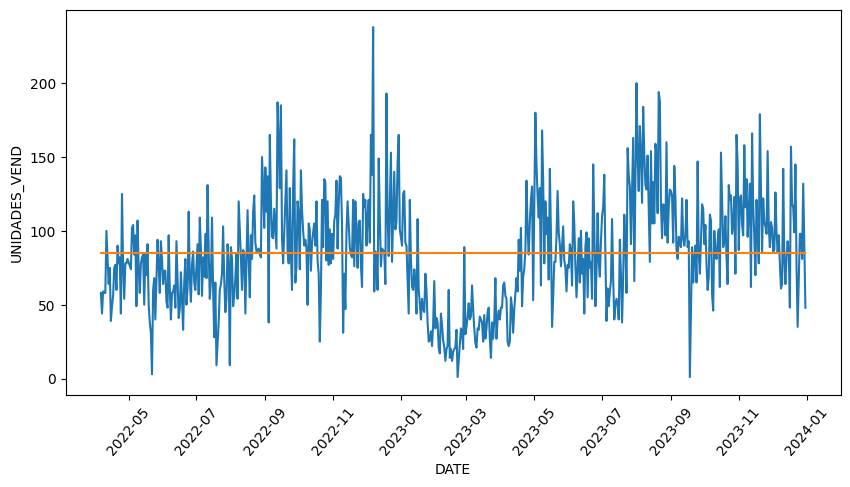

In [83]:
x = df['DATE']
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_PROM']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

* ¿Cuán bien ajusta esta estimación?

Calculemos el Error Cuadrático Medio y su raíz...

In [84]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [85]:
model_mean_RMSE = RMSE(df.UNIDADES_PROM, df.UNIDADES_VEND)
model_mean_RMSE

37.245008328341285

In [86]:
# Guardamos todo en un dataframe
dfResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dfResults.loc[0,"Model"] = "Mean"
dfResults.loc[0,"Forecast"] = model_mean_pred
dfResults.loc[0,"RMSE"] = model_mean_RMSE
dfResults.head()

Model   Forecast       RMSE
0  Mean  84.815409  37.245008

In [87]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
df["timeIndex"] = df.DATE - df.DATE.min()
df.head()

DATE  item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
0 2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
1 2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2 2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
3 2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
4 2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   

   UNIDADES_PROM timeIndex  
0      84.815409    0 days  
1      84.815409    1 days  
2      84.815409    2 days  
3      84.815409    3 days  
4      84.815409    4 days

In [88]:
# Transformamos la última columna a días con timedelta
df["timeIndex"] =  df["timeIndex"]/np.timedelta64(1, 'D')


In [89]:
# Redondeamos, quitando todos los decimales
df["timeIndex"] = df["timeIndex"].round(0).astype(int)
df.timeIndex.tail()

618    630
619    631
620    632
621    633
622    634
Name: timeIndex, dtype: int64

In [90]:
df.head()

DATE  item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
0 2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
1 2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2 2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
3 2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
4 2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   

   UNIDADES_PROM  timeIndex  
0      84.815409          0  
1      84.815409          1  
2      84.815409          2  
3      84.815409          3  
4      84.815409          4

In [91]:
# creamos un dataset agrupado por fecha
groupby_date = df.groupby(df.DATE)["UNIDADES_VEND"].sum()
groupby_date = pd.DataFrame(groupby_date)
groupby_date.head(10)

UNIDADES_VEND
DATE                     
2022-04-06             58
2022-04-07             44
2022-04-08             59
2022-04-09             58
2022-04-10             58
2022-04-11            100
2022-04-12             82
2022-04-13             64
2022-04-14             75
2022-04-15             39

In [92]:
groupby_date["DATE"] =groupby_date.index

In [93]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
groupby_date["timeIndex"] = groupby_date.DATE - groupby_date.DATE.min()

# Transformamos la última columna a días con timedelta
groupby_date["timeIndex"] =  groupby_date["timeIndex"]/np.timedelta64(1, 'D')

In [94]:
groupby_date.head()

UNIDADES_VEND       DATE  timeIndex
DATE                                           
2022-04-06             58 2022-04-06        0.0
2022-04-07             44 2022-04-07        1.0
2022-04-08             59 2022-04-08        2.0
2022-04-09             58 2022-04-09        3.0
2022-04-10             58 2022-04-10        4.0

In [95]:
# Redondeamos, quitando todos los decimales
groupby_date["timeIndex"] = groupby_date["timeIndex"].round(0).astype(int)
groupby_date.timeIndex.tail()

DATE
2023-12-27    630
2023-12-28    631
2023-12-29    632
2023-12-30    633
2023-12-31    634
Name: timeIndex, dtype: int64

In [96]:
# Ahora fiteamos nuestro modelo de regresión lineal entre priceMod y timeIndex
model_linear = smf.ols('UNIDADES_VEND ~ timeIndex', data = df).fit()

In [97]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UNIDADES_VEND   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     32.11
Date:                Tue, 07 May 2024   Prob (F-statistic):           2.23e-08
Time:                        20:01:01   Log-Likelihood:                -3122.0
No. Observations:                 623   AIC:                             6248.
Df Residuals:                     621   BIC:                             6257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4788      2.920     24.139      0.000      64.745      76.212
timeIndex      0.0452      0.008      5.667      0.000       0.030       0.061
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.547
Skew:                           0.376   Prob(JB):                     9.39e-05
Kurtosis:                       3.388   Cond. No.                         734.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
model_linear_pred = model_linear.predict()


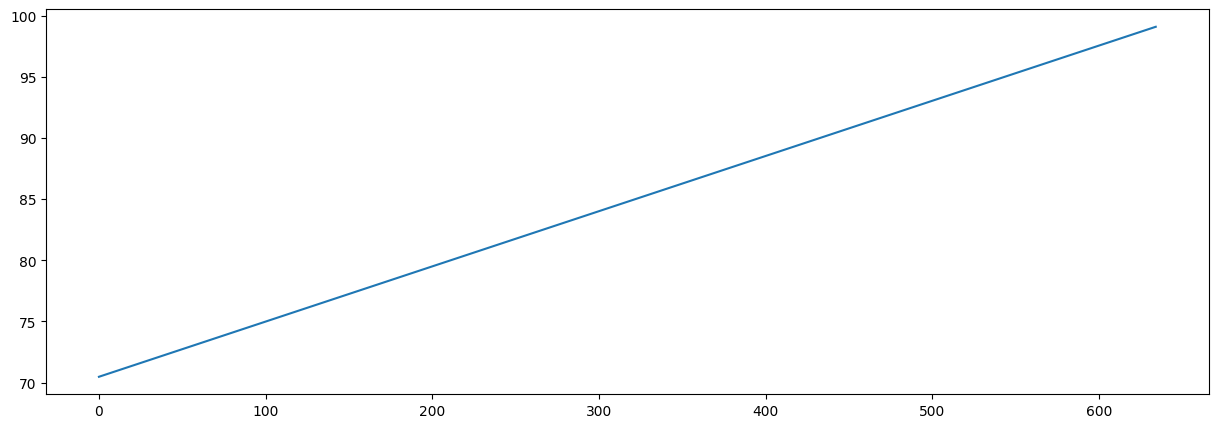

In [99]:
# Ploteamos los resultados de la predicción
plt.rcParams['figure.figsize'] = (15, 5)
#df.plot(kind="line", x="timeIndex", y = "UNIDADES_VEND")
plt.plot(df.timeIndex,model_linear_pred, '-');

In [100]:
df

DATE  item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
0   2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
1   2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2   2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
3   2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
4   2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   
..         ...       ...                   ...            ...  ...   ...   
618 2023-12-27    254100  QUESO GOUDA LAMINADO             98   12  2023   
619 2023-12-28    254100  QUESO GOUDA LAMINADO             81   12  2023   
620 2023-12-29    254100  QUESO GOUDA LAMINADO            132   12  2023   
621 2023-12-30    254100  QUESO GOUDA LAMINADO             92   12  2023   
622 2023-12-31    254100  QUESO GOUDA LAMINADO             48   12  2023   

     UNIDADES_PROM  timeIndex  
0        84.815409          0  
1        84.815409          1  
2        84.815409          2  
3        84.815409          3  
4        84.815409          4  
..             ...        ...  
618      84.815409        630  
619      84.815409        631  
620      84.815409        632  
621      84.815409        633  
622      84.815409        634  

[623 rows x 8 columns]

In [101]:
df["UNIDADES_Linear"] = model_linear_pred
df.head()

DATE  item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
0 2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
1 2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2 2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
3 2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
4 2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   

   UNIDADES_PROM  timeIndex  UNIDADES_Linear  
0      84.815409          0        70.478780  
1      84.815409          1        70.523931  
2      84.815409          2        70.569081  
3      84.815409          3        70.614231  
4      84.815409          4        70.659382

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

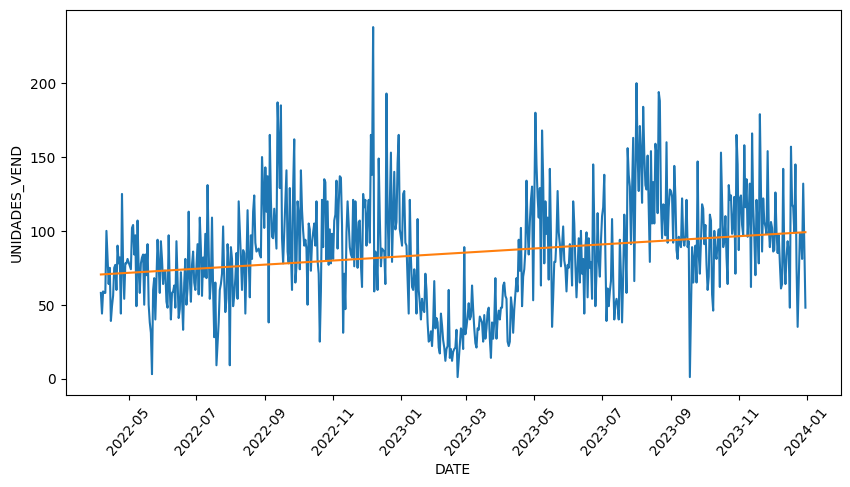

In [102]:
x = df['DATE']
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_Linear']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [103]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(df.UNIDADES_Linear, df.UNIDADES_VEND)
model_linear_RMSE

36.31783917968032

In [104]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
dfResults.loc[1,"Model"] = "Linear"
dfResults.loc[1,"Forecast"] = model_linear_pred[-1]
dfResults.loc[1,"RMSE"] = model_linear_RMSE
dfResults.head()

Model   Forecast       RMSE
0    Mean  84.815409  37.245008
1  Linear  99.104061  36.317839

In [105]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [106]:
df.set_index('DATE', inplace=True)


In [107]:
df

item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                   
2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   
...              ...                   ...            ...  ...   ...   
2023-12-27    254100  QUESO GOUDA LAMINADO             98   12  2023   
2023-12-28    254100  QUESO GOUDA LAMINADO             81   12  2023   
2023-12-29    254100  QUESO GOUDA LAMINADO            132   12  2023   
2023-12-30    254100  QUESO GOUDA LAMINADO             92   12  2023   
2023-12-31    254100  QUESO GOUDA LAMINADO             48   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  
DATE                                                   
2022-04-06      84.815409          0        70.478780  
2022-04-07      84.815409          1        70.523931  
2022-04-08      84.815409          2        70.569081  
2022-04-09      84.815409          3        70.614231  
2022-04-10      84.815409          4        70.659382  
...                   ...        ...              ...  
2023-12-27      84.815409        630        98.923460  
2023-12-28      84.815409        631        98.968611  
2023-12-29      84.815409        632        99.013761  
2023-12-30      84.815409        633        99.058911  
2023-12-31      84.815409        634        99.104061  

[623 rows x 8 columns]

In [108]:
# Ordenar por subcategoría y fecha
df.sort_values(['DATE'], inplace=True)

# Aplicar shift para obtener unidades vendidas del día posterior
df['UNIDADES_Shift'] = df['UNIDADES_VEND'].shift(1)

df.iloc[1:200]

item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                   
2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-11    254100  QUESO GOUDA LAMINADO            100    4  2022   
...              ...                   ...            ...  ...   ...   
2022-10-23    254100  QUESO GOUDA LAMINADO             89   10  2022   
2022-10-24    254100  QUESO GOUDA LAMINADO            135   10  2022   
2022-10-25    254100  QUESO GOUDA LAMINADO            133   10  2022   
2022-10-26    254100  QUESO GOUDA LAMINADO             80   10  2022   
2022-10-27    254100  QUESO GOUDA LAMINADO            120   10  2022   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  
DATE                                                                   
2022-04-07      84.815409          1        70.523931            58.0  
2022-04-08      84.815409          2        70.569081            44.0  
2022-04-09      84.815409          3        70.614231            59.0  
2022-04-10      84.815409          4        70.659382            58.0  
2022-04-11      84.815409          5        70.704532            58.0  
...                   ...        ...              ...             ...  
2022-10-23      84.815409        200        79.508838           121.0  
2022-10-24      84.815409        201        79.553988            89.0  
2022-10-25      84.815409        202        79.599138           135.0  
2022-10-26      84.815409        203        79.644288           133.0  
2022-10-27      84.815409        204        79.689439            80.0  

[199 rows x 9 columns]

In [109]:
df['UNIDADES_Shift'] = df['UNIDADES_Shift'].fillna(0)

In [110]:
df

item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                   
2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   
...              ...                   ...            ...  ...   ...   
2023-12-27    254100  QUESO GOUDA LAMINADO             98   12  2023   
2023-12-28    254100  QUESO GOUDA LAMINADO             81   12  2023   
2023-12-29    254100  QUESO GOUDA LAMINADO            132   12  2023   
2023-12-30    254100  QUESO GOUDA LAMINADO             92   12  2023   
2023-12-31    254100  QUESO GOUDA LAMINADO             48   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  
DATE                                                                   
2022-04-06      84.815409          0        70.478780             0.0  
2022-04-07      84.815409          1        70.523931            58.0  
2022-04-08      84.815409          2        70.569081            44.0  
2022-04-09      84.815409          3        70.614231            59.0  
2022-04-10      84.815409          4        70.659382            58.0  
...                   ...        ...              ...             ...  
2023-12-27      84.815409        630        98.923460            98.0  
2023-12-28      84.815409        631        98.968611            98.0  
2023-12-29      84.815409        632        99.013761            81.0  
2023-12-30      84.815409        633        99.058911           132.0  
2023-12-31      84.815409        634        99.104061            92.0  

[623 rows x 9 columns]

In [111]:
# creamos un dataset agrupado por fecha
groupby_date2 = df.groupby(df.index)["UNIDADES_VEND"].sum()
groupby_date2 = pd.DataFrame(groupby_date)
groupby_date2.head(10)

UNIDADES_VEND       DATE  timeIndex
DATE                                           
2022-04-06             58 2022-04-06          0
2022-04-07             44 2022-04-07          1
2022-04-08             59 2022-04-08          2
2022-04-09             58 2022-04-09          3
2022-04-10             58 2022-04-10          4
2022-04-11            100 2022-04-11          5
2022-04-12             82 2022-04-12          6
2022-04-13             64 2022-04-13          7
2022-04-14             75 2022-04-14          8
2022-04-15             39 2022-04-15          9

In [112]:
groupby_date2["UNIDADES_Shift"] = groupby_date2.UNIDADES_VEND.shift(periods = 1, fill_value=0)
groupby_date2.tail(10)

UNIDADES_VEND       DATE  timeIndex  UNIDADES_Shift
DATE                                                           
2023-12-21             99 2023-12-21        624             116
2023-12-22            145 2023-12-22        625              99
2023-12-23             76 2023-12-23        626             145
2023-12-24             35 2023-12-24        627              76
2023-12-26             98 2023-12-26        629              35
2023-12-27             98 2023-12-27        630              98
2023-12-28             81 2023-12-28        631              98
2023-12-29            132 2023-12-29        632              81
2023-12-30             92 2023-12-30        633             132
2023-12-31             48 2023-12-31        634              92

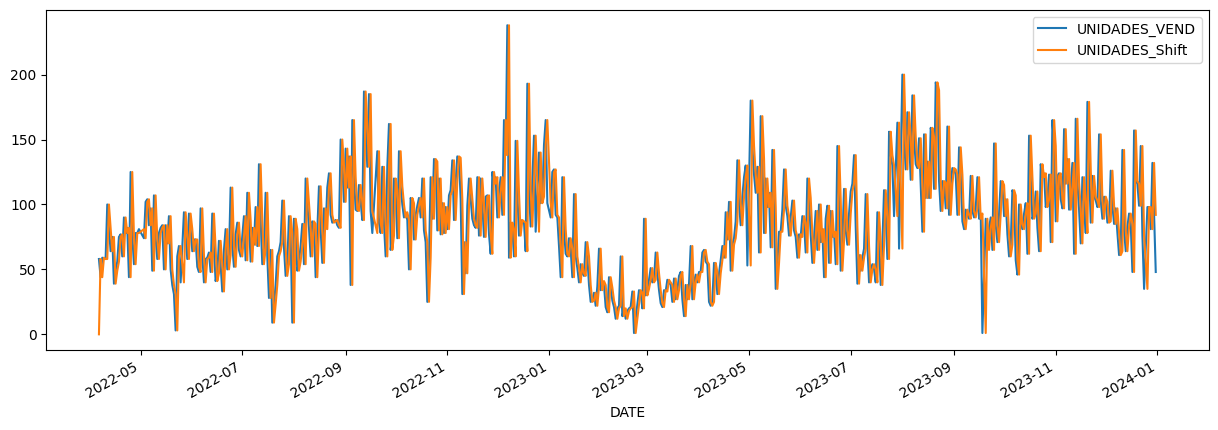

In [113]:
plt.rcParams['figure.figsize'] = (15, 5)
groupby_date.plot(kind="line", x="DATE", y = ["UNIDADES_VEND","UNIDADES_Shift"]);

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

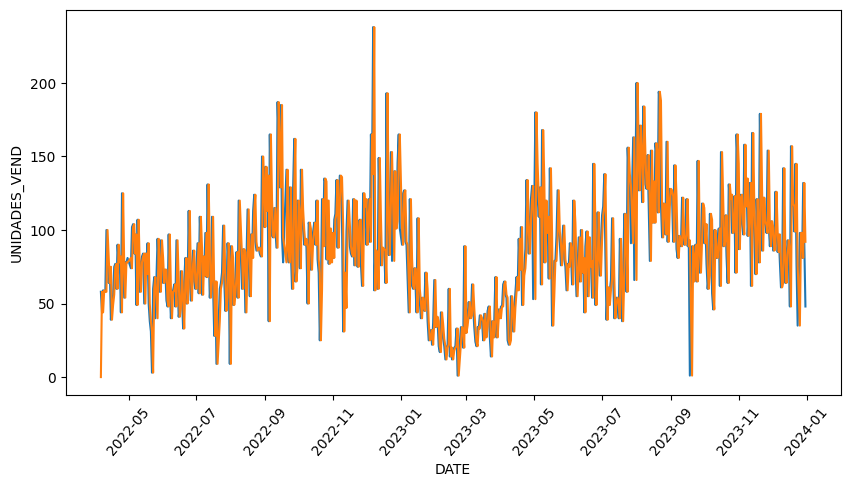

In [114]:
x = df.index
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_Shift']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [115]:
# Calculamos el RMSE y almacenamos los resultados
dfResults.loc[2,"Model"] = "Random"
dfResults.loc[2,"Forecast"] = df.UNIDADES_Shift[-1]
dfResults.loc[2,"RMSE"] = RMSE(df.UNIDADES_Shift, df.UNIDADES_VEND)
dfResults.head()

Model   Forecast       RMSE
0    Mean  84.815409  37.245008
1  Linear  99.104061  36.317839
2  Random       92.0  36.776318

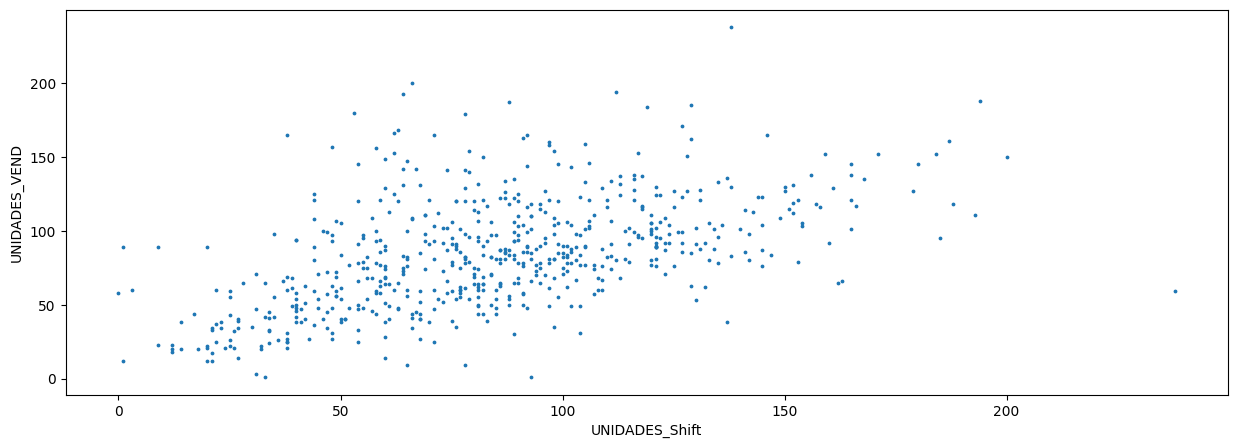

In [116]:
plt.rcParams['figure.figsize'] = (15, 5)
groupby_date.plot(kind= "scatter", y = "UNIDADES_VEND", x = "UNIDADES_Shift", s = 3);

In [117]:
df.tail()

item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                   
2023-12-27    254100  QUESO GOUDA LAMINADO             98   12  2023   
2023-12-28    254100  QUESO GOUDA LAMINADO             81   12  2023   
2023-12-29    254100  QUESO GOUDA LAMINADO            132   12  2023   
2023-12-30    254100  QUESO GOUDA LAMINADO             92   12  2023   
2023-12-31    254100  QUESO GOUDA LAMINADO             48   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  
DATE                                                                   
2023-12-27      84.815409        630        98.923460            98.0  
2023-12-28      84.815409        631        98.968611            98.0  
2023-12-29      84.815409        632        99.013761            81.0  
2023-12-30      84.815409        633        99.058911           132.0  
2023-12-31      84.815409        634        99.104061            92.0

In [118]:
# Calculamos la media móvil de 3 días para suavizar los valores y ploteamos
df['UNIDADES_VEND3d'] = df.UNIDADES_VEND.rolling(window = '3d' ).mean()
df.head(793)

item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                   
2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   
...              ...                   ...            ...  ...   ...   
2023-12-27    254100  QUESO GOUDA LAMINADO             98   12  2023   
2023-12-28    254100  QUESO GOUDA LAMINADO             81   12  2023   
2023-12-29    254100  QUESO GOUDA LAMINADO            132   12  2023   
2023-12-30    254100  QUESO GOUDA LAMINADO             92   12  2023   
2023-12-31    254100  QUESO GOUDA LAMINADO             48   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  \
DATE                                                                    
2022-04-06      84.815409          0        70.478780             0.0   
2022-04-07      84.815409          1        70.523931            58.0   
2022-04-08      84.815409          2        70.569081            44.0   
2022-04-09      84.815409          3        70.614231            59.0   
2022-04-10      84.815409          4        70.659382            58.0   
...                   ...        ...              ...             ...   
2023-12-27      84.815409        630        98.923460            98.0   
2023-12-28      84.815409        631        98.968611            98.0   
2023-12-29      84.815409        632        99.013761            81.0   
2023-12-30      84.815409        633        99.058911           132.0   
2023-12-31      84.815409        634        99.104061            92.0   

            UNIDADES_VEND3d  
DATE                         
2022-04-06        58.000000  
2022-04-07        51.000000  
2022-04-08        53.666667  
2022-04-09        53.666667  
2022-04-10        58.333333  
...                     ...  
2023-12-27        98.000000  
2023-12-28        92.333333  
2023-12-29       103.666667  
2023-12-30       101.666667  
2023-12-31        90.666667  

[623 rows x 10 columns]

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

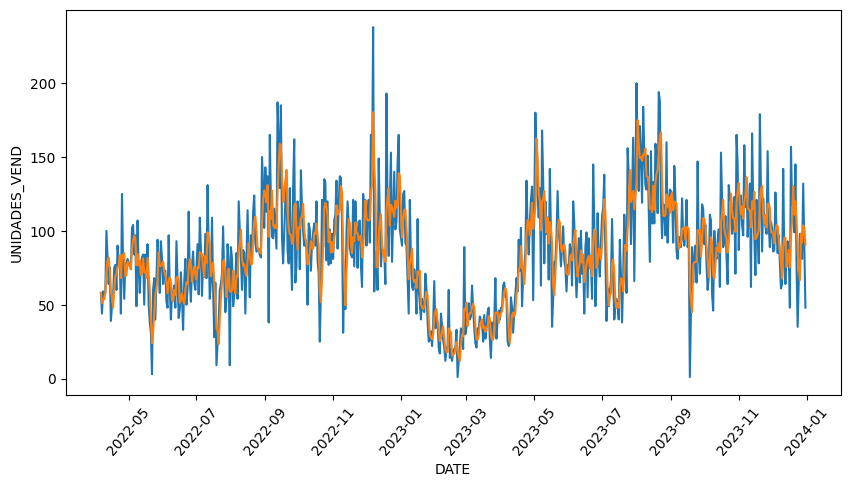

In [119]:
x = df.index
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_VEND3d']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [120]:
# Calculamos el RMSE y almacenamos los resultados
dfResults.loc[3,"Model"] = "Moving Average 3d"
dfResults.loc[3,"Forecast"] = df.UNIDADES_VEND3d[-1]
dfResults.loc[3,"RMSE"] = RMSE(df.UNIDADES_VEND3d, df.UNIDADES_VEND)
dfResults.head()

Model   Forecast       RMSE
0               Mean  84.815409  37.245008
1             Linear  99.104061  36.317839
2             Random       92.0  36.776318
3  Moving Average 3d  90.666667  21.899134

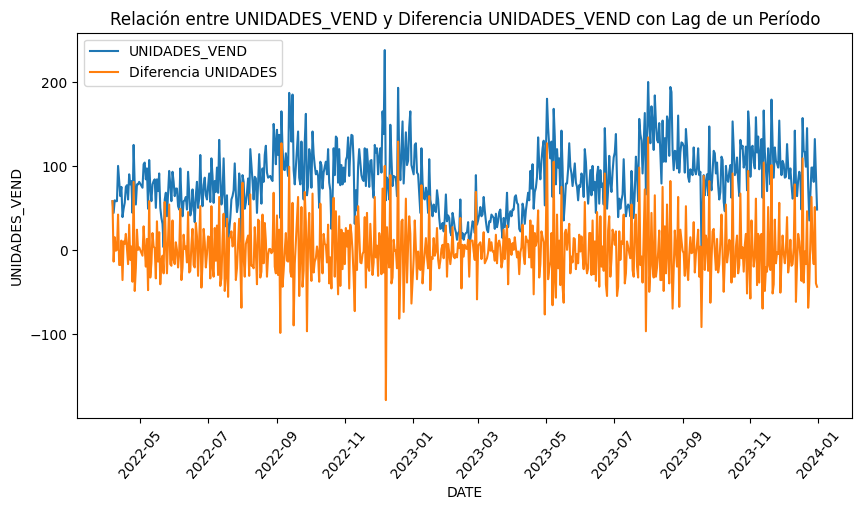

In [121]:
# Crear la columna de diferencias
df["UNIDADES_Diff"] = df.UNIDADES_VEND - df.UNIDADES_Shift

# Crear el gráfico de líneas
x = df.index
y1 = df['UNIDADES_VEND']
y2 = df['UNIDADES_Diff']

fig, ax = plt.subplots(figsize=(10, 5))

# Plotear las series de tiempo
sns.lineplot(x=x, y=y1, data=df, label='UNIDADES_VEND')
sns.lineplot(x=x, y=y2, data=df, label='Diferencia UNIDADES')

# Añadir título
plt.title('Relación entre UNIDADES_VEND y Diferencia UNIDADES_VEND con Lag de un Período')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [122]:
ts = df.UNIDADES_VEND
ts_diff = df.UNIDADES_Diff
ts_diff.dropna(inplace = True)

In [123]:
# Importamos plots ACF y PACF
from statsmodels.tsa.stattools import acf, pacf

In [124]:
lag_acf = acf(ts_diff, nlags=50)
lag_acf

array([ 1.00000000e+00, -4.55960807e-01, -1.16132832e-01,  1.13619779e-01,
        6.61378378e-02, -1.59503613e-01, -7.54828553e-02,  3.36339481e-01,
       -2.16784701e-01, -5.13372708e-02,  1.13876983e-01, -1.59735874e-02,
       -6.89148995e-02, -1.70293825e-02,  1.77082712e-01, -1.07782321e-01,
       -3.75960944e-02,  5.34854672e-02,  2.07085207e-02, -1.09865192e-01,
       -8.03987702e-03,  1.70232185e-01, -1.15562205e-01, -3.52788072e-03,
        6.64457219e-02, -4.78927427e-02, -1.10659094e-02, -6.58899275e-02,
        1.95637040e-01, -1.28710257e-01, -2.36563222e-02,  8.17060836e-02,
       -3.93909223e-02, -3.23205379e-02, -2.10090616e-02,  1.66058015e-01,
       -1.61508060e-01, -1.21185848e-02,  8.93933005e-02, -2.44426642e-03,
       -5.26507410e-02, -2.17450365e-03,  7.74158154e-02, -8.09084546e-02,
        1.56341839e-04,  3.39099092e-02,  1.19526558e-02, -4.11876748e-02,
       -5.94337089e-02,  1.43882566e-01, -9.91809188e-02])

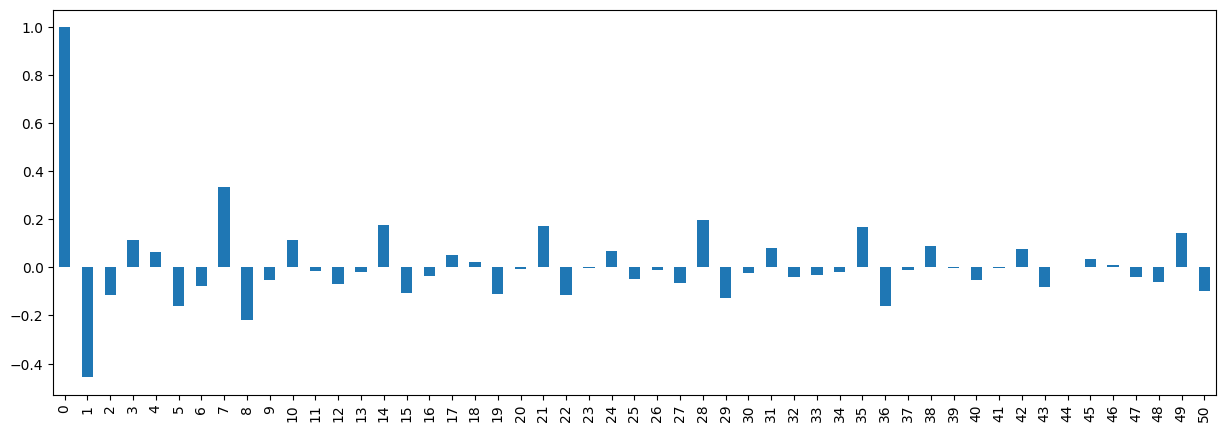

In [125]:
ACF = pd.Series(lag_acf)
ACF.plot(kind = "bar");

In [126]:
lag_pacf = pacf(ts_diff, nlags=50, method='ols');

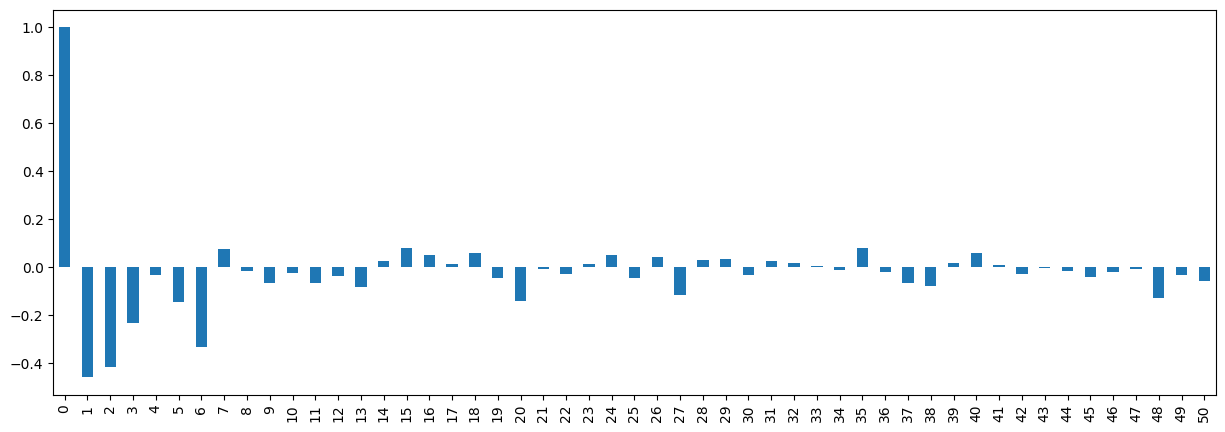

In [127]:
PACF = pd.Series(lag_pacf)
PACF.plot(kind = "bar");

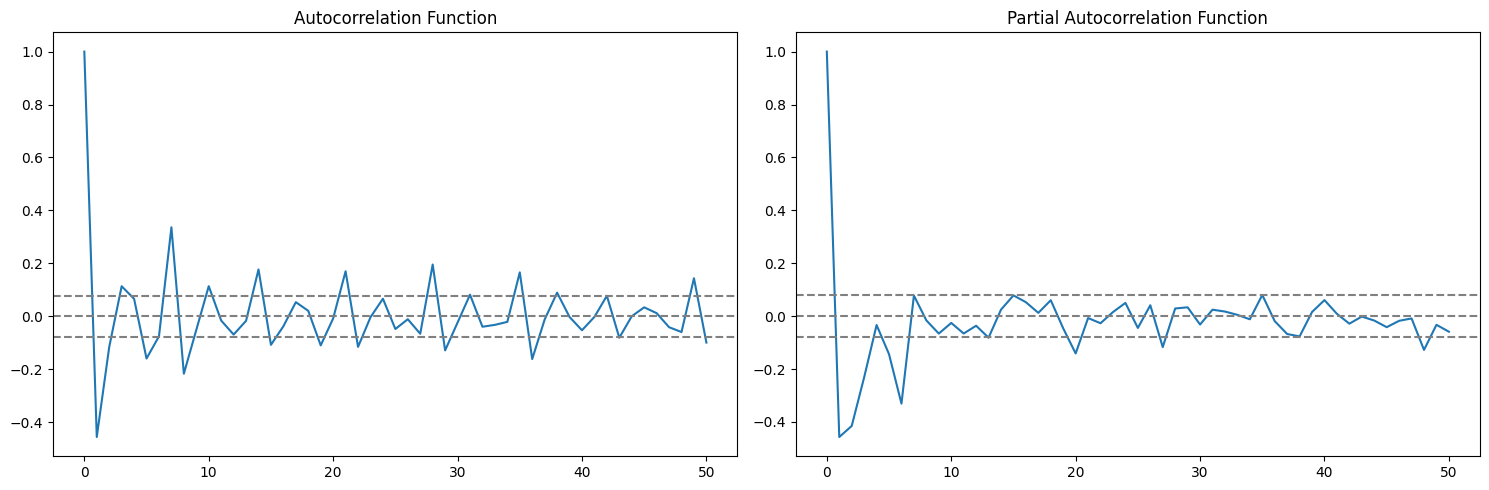

In [128]:
# Veamos qué parámetros son significativamente distintos de cero

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [129]:
import statsmodels.api as sm
ts.head()

DATE
2022-04-06    58
2022-04-07    44
2022-04-08    59
2022-04-09    58
2022-04-10    58
Name: UNIDADES_VEND, dtype: int64

In [130]:
# Instancio el modelo con parámetros (p=1,d=0,q=1) según el análisis de ACF y PACF
# En este caso d=0 porque trabajamos directamente con las diferencias
model_AR1MA = sm.tsa.arima.ARIMA(ts_diff, order=(7,0,7))

# Fiteo el modelo
results_ARIMA = model_AR1MA.fit()
results_ARIMA.fittedvalues.head()

/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

DATE
2022-04-06     0.085771
2022-04-07   -26.412622
2022-04-08   -15.366361
2022-04-09   -17.197650
2022-04-10    -7.069067
dtype: float64

In [131]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:          UNIDADES_Diff   No. Observations:                  623
Model:                 ARIMA(7, 0, 7)   Log Likelihood               -2926.823
Date:                Tue, 07 May 2024   AIC                           5885.645
Time:                        20:01:10   BIC                           5956.598
Sample:                             0   HQIC                          5913.219
                                - 623                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0858      0.238      0.360      0.719      -0.381       0.552
ar.L1         -0.4520      0.109     -4.134      0.000      -0.666      -0.238
ar.L2         -0.2831      0.082     -3.469      0.0

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

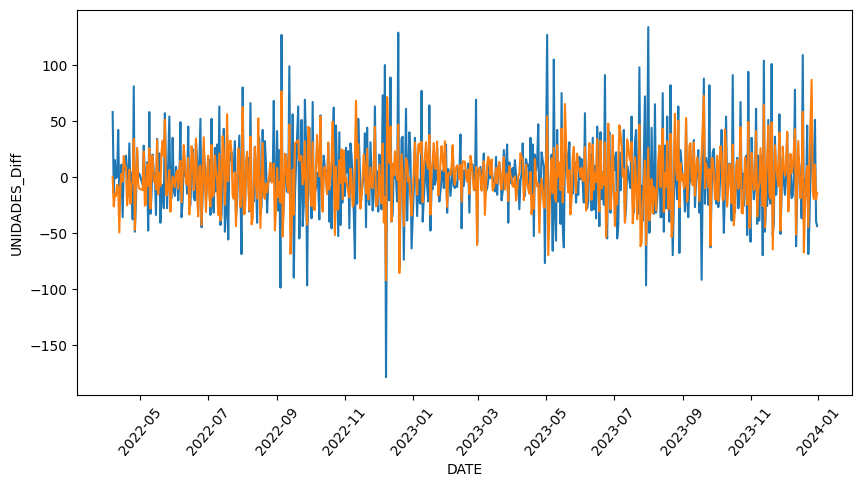

In [132]:
x = df.index
y = ts_diff
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = results_ARIMA.fittedvalues
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [133]:
df.head()

item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                   
2022-04-06    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-07    254100  QUESO GOUDA LAMINADO             44    4  2022   
2022-04-08    254100  QUESO GOUDA LAMINADO             59    4  2022   
2022-04-09    254100  QUESO GOUDA LAMINADO             58    4  2022   
2022-04-10    254100  QUESO GOUDA LAMINADO             58    4  2022   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  \
DATE                                                                    
2022-04-06      84.815409          0        70.478780             0.0   
2022-04-07      84.815409          1        70.523931            58.0   
2022-04-08      84.815409          2        70.569081            44.0   
2022-04-09      84.815409          3        70.614231            59.0   
2022-04-10      84.815409          4        70.659382            58.0   

            UNIDADES_VEND3d  UNIDADES_Diff  
DATE                                        
2022-04-06        58.000000           58.0  
2022-04-07        51.000000          -14.0  
2022-04-08        53.666667           15.0  
2022-04-09        53.666667           -1.0  
2022-04-10        58.333333            0.0

In [134]:
ts_diff.sum()

48.0

In [135]:
df['predictions_ARIMA_diff'] = pd.Series(results_ARIMA.fittedvalues, copy=True)
df.predictions_ARIMA_diff.head()

DATE
2022-04-06     0.085771
2022-04-07   -26.412622
2022-04-08   -15.366361
2022-04-09   -17.197650
2022-04-10    -7.069067
Name: predictions_ARIMA_diff, dtype: float64

In [136]:
df.tail()

item_nbr           item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                   
2023-12-27    254100  QUESO GOUDA LAMINADO             98   12  2023   
2023-12-28    254100  QUESO GOUDA LAMINADO             81   12  2023   
2023-12-29    254100  QUESO GOUDA LAMINADO            132   12  2023   
2023-12-30    254100  QUESO GOUDA LAMINADO             92   12  2023   
2023-12-31    254100  QUESO GOUDA LAMINADO             48   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  \
DATE                                                                    
2023-12-27      84.815409        630        98.923460            98.0   
2023-12-28      84.815409        631        98.968611            98.0   
2023-12-29      84.815409        632        99.013761            81.0   
2023-12-30      84.815409        633        99.058911           132.0   
2023-12-31      84.815409        634        99.104061            92.0   

            UNIDADES_VEND3d  UNIDADES_Diff  predictions_ARIMA_diff  
DATE                                                                
2023-12-27        98.000000            0.0              -12.614874  
2023-12-28        92.333333          -17.0              -19.683906  
2023-12-29       103.666667           51.0               11.199611  
2023-12-30       101.666667          -40.0              -20.172329  
2023-12-31        90.666667          -44.0              -14.245460

In [137]:
ts_diff.head()

DATE
2022-04-06    58.0
2022-04-07   -14.0
2022-04-08    15.0
2022-04-09    -1.0
2022-04-10     0.0
Name: UNIDADES_Diff, dtype: float64

In [138]:
predictions_ARIMA_diff = df.predictions_ARIMA_diff
predictions_ARIMA_diff.tail()

DATE
2023-12-27   -12.614874
2023-12-28   -19.683906
2023-12-29    11.199611
2023-12-30   -20.172329
2023-12-31   -14.245460
Name: predictions_ARIMA_diff, dtype: float64

In [139]:
ts.iloc[0]

58

In [140]:
predictions_ARIMA = pd.Series(ts.iloc[0], index=ts.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA.tail()

DATE
2023-12-27    45.385126
2023-12-28    38.316094
2023-12-29    69.199611
2023-12-30    37.827671
2023-12-31    43.754540
dtype: float64

In [141]:
# Guardamos nuestros resultados
df['UNIDADES_ARIMA'] = predictions_ARIMA

In [142]:
df['UNIDADES_ARIMA'].tail

<bound method NDFrame.tail of DATE
2022-04-06    58.085771
2022-04-07    31.587378
2022-04-08    42.633639
2022-04-09    40.802350
2022-04-10    50.930933
                ...    
2023-12-27    45.385126
2023-12-28    38.316094
2023-12-29    69.199611
2023-12-30    37.827671
2023-12-31    43.754540
Name: UNIDADES_ARIMA, Length: 623, dtype: float64>

In [143]:
df['UNIDADES_VEND'].tail

<bound method NDFrame.tail of DATE
2022-04-06     58
2022-04-07     44
2022-04-08     59
2022-04-09     58
2022-04-10     58
             ... 
2023-12-27     98
2023-12-28     81
2023-12-29    132
2023-12-30     92
2023-12-31     48
Name: UNIDADES_VEND, Length: 623, dtype: int64>

In [144]:
# Incorporamos estimaciones y resultados a nuestro DF
dfResults.loc[4,"Model"] = "ARIMA"
dfResults.loc[4,"Forecast"] = df.UNIDADES_ARIMA[-1]
dfResults.loc[4,"RMSE"] = RMSE(df.predictions_ARIMA_diff, df.UNIDADES_Diff)



In [145]:
dfResults[["Model","RMSE"]]


Model       RMSE
0               Mean  37.245008
1             Linear  36.317839
2             Random  36.776318
3  Moving Average 3d  21.899134
4              ARIMA  26.569026

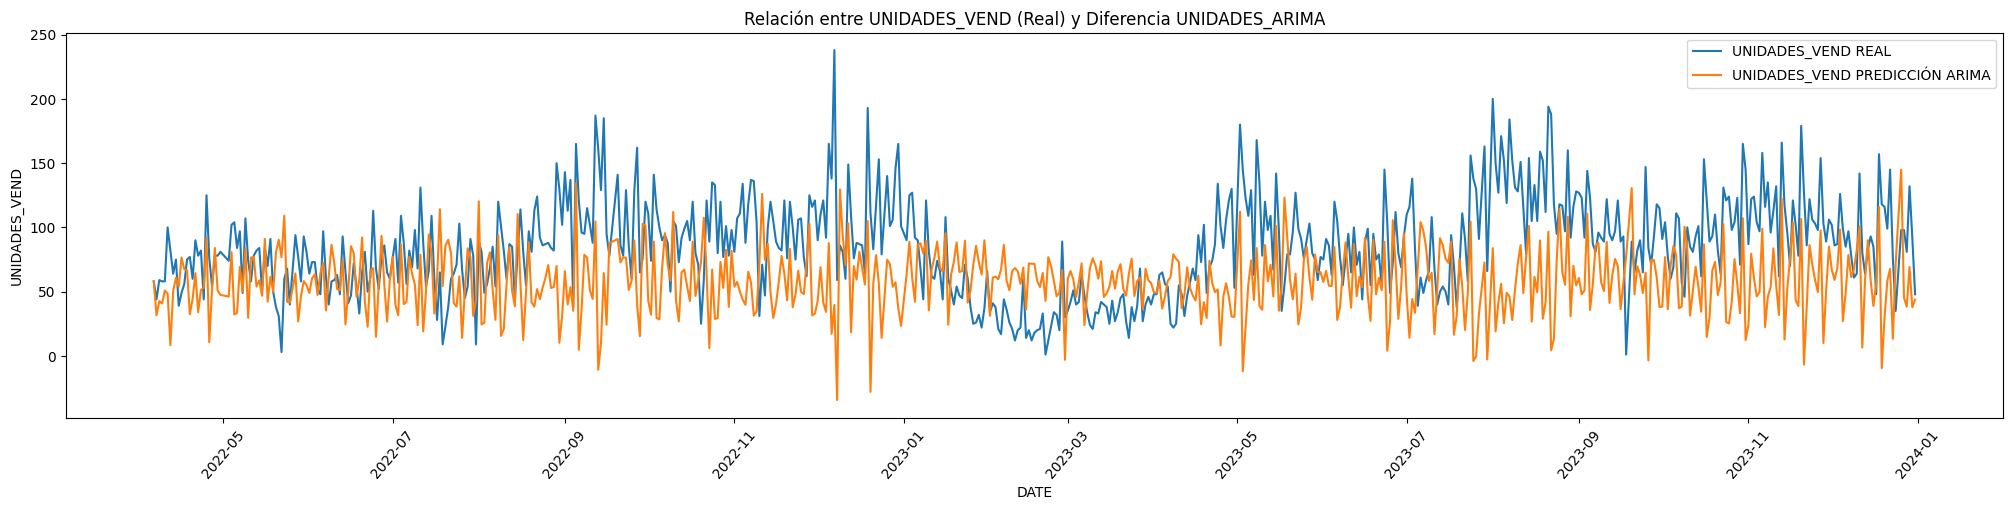

In [146]:

# Crear el gráfico de líneas
x = df.index
y1 = df['UNIDADES_VEND']
y2 = df['UNIDADES_ARIMA']

fig, ax = plt.subplots(figsize=(25, 5))

# Plotear las series de tiempo
sns.lineplot(x=x, y=y1, data=df, label='UNIDADES_VEND REAL')
sns.lineplot(x=x, y=y2, data=df, label='UNIDADES_VEND PREDICCIÓN ARIMA')

# Añadir título
plt.title('Relación entre UNIDADES_VEND (Real) y Diferencia UNIDADES_ARIMA')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [147]:
#df = df_bkp
#df = df.dropna()

In [148]:
df.shape

(623, 13)